<a href="https://colab.research.google.com/github/MarielGomezRan/G35.-Modulo-II-Modelos-Estad-sticos/blob/main/2.%20Variables%20Aleatorias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto M√≥dulo II: T√©cnicas Estad√≠sticas
# 2. Variables Aleatorias
### **Alumna: Mariel G√≥mez Rangel**

**Introducci√≥n**

En este cuaderno se explicar√° qu√© son las variables aleatorias, abordando tanto las variables aleatorias discretas como las variables aleatorias continuas.

Asimismo, se incluir√° la simulaci√≥n de variables aleatorias, junto con conceptos importantes como la Funci√≥n Generadora de Momentos, la Funci√≥n Caracter√≠stica, la Ley de los Grandes N√∫meros y el Teorema Central del L√≠mite.

Cada uno de estos temas se desarrollar√° acompa√±ado de ejemplos pr√°cticos que facilitar√°n la comprensi√≥n de los conceptos y su aplicaci√≥n en distintos contextos estad√≠sticos.

Una variable aleatoria es una funci√≥n que asigna un valor num√©rico a cada resultado de un experimento aleatorio.

Se clasifica en:

*   Discretas: las cuales toman valores aislados.
*   Continuas: pueden tomar cualquier valor en un intervalo.



## 2.1 Variables Aleatorias Discretas

Una variable aleatoria discreta es una variable que puede tomar un n√∫mero finito o infinito numerable de valores, es decir, que se puede contar.

Se asocia a un experimento aleatorio y a cada resultado posible se le asigna un valor num√©rico.

**Propiedades:**


1.   **No negatividad:** La probabilidad de cada valor posible debe ser mayor o igual a cero
$$P(X=x_i)\geq0$$
2.   **Suma igual a 1:** La suma de las probabilidades de todos los valores posibles que puede tomar la variable debe ser 1
$$\sum_{i}^{}P(X=x_i)=1$$
3. **Funci√≥n de probabilidad:** Se define una fdp que asigna a cada valor posible $x_i$ la probabilidad de que ocurra
$$f(x_i)=P(X=x_i)$$
4. **Esperanza:** Para calcular la esperanza de una v.a discreta, se utiliza
$$E[X]=\sum x_i \cdot p(x_i)$$
5. **Varianza:** Para calcular la varianza de una v.a discreta, se utiliza
  $$ \text{Var}(X) = E[X^2] - (E[X])^2 = \sum (x_i - E[X])^2 \cdot p(x_i) $$


**Ejemplo:** Lanzar un dado

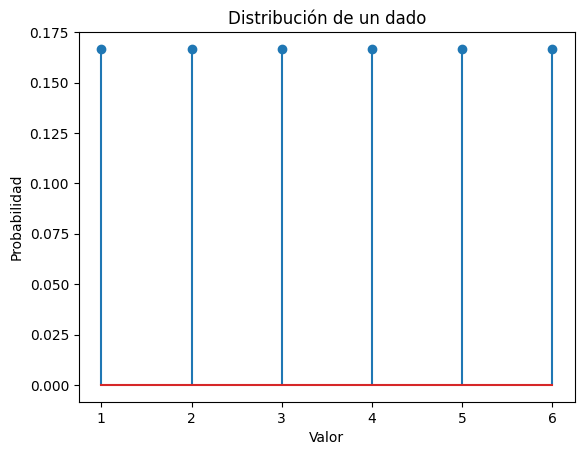

In [2]:
import numpy as np
import matplotlib.pyplot as plt

valores = [1, 2, 3, 4, 5, 6]
probabilidades = [1/6]*6

plt.stem(valores, probabilidades)
plt.title("Distribuci√≥n de un dado")
plt.xlabel("Valor")
plt.ylabel("Probabilidad")
plt.show()


**Ejemplo:**

Se tienen $2$ urnas, cada una de las cuales contiene $10$ bolas numeradas del $1$ al $10$.

Un experimento aleatorio consiste en seleccionar al azar una bola de cada urna.

Sea $X$ la variable aleatoria que representa la diferencia de los n√∫meros de las dos bolas seleccionadas.

* Define $\Omega$
* Calcula las probabilidades asociadas
* Define la funci√≥n de densidad
* Verifica que $\sum_{x\in R_X}f_X(x) = 1$
* Gr√°fica la funci√≥n de densidad

Adem√°s, calcula la probabilidad de que los n√∫meros de las dos bolas seleccionadas difieran por $2$ o m√°s.

Cardinalidad de Œ©: 100
Funci√≥n de densidad: {5: 0.1, 4: 0.12, 1: 0.18, 0: 0.1, 6: 0.08, 3: 0.14, 2: 0.16, 8: 0.04, 7: 0.06, 9: 0.02}
Suma de las probabilidades: 1.0


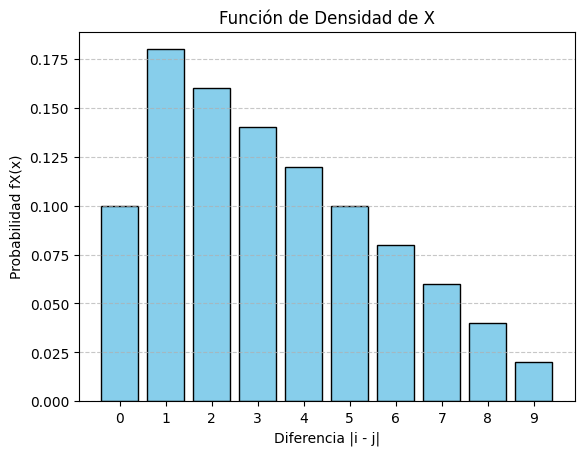

P(X ‚â• 2) = 0.72


In [15]:
# Importamos las librer√≠as necesarias
from itertools import product
from collections import defaultdict
from fractions import Fraction
import pandas as pd
import matplotlib.pyplot as plt

# -------------------- 1. Definir el espacio muestral (Œ©) --------------------
Omega = set(product(range(1, 11), repeat=2))  # Todas las combinaciones (i, j) con i, j ‚àà {1, ..., 10}
card_Omega = len(Omega)  # Tama√±o del espacio muestral

print(f"Cardinalidad de Œ©: {card_Omega}")

# -------------------- 2. Definir la variable aleatoria X = |i - j| --------------------
X = {(i, j): abs(i - j) for i, j in Omega}  # Diccionario donde cada par (i, j) se asocia con |i - j|

# Agrupamos por valores de X
dX = defaultdict(set)
for (i, j), x in X.items():
    dX[x].add((i, j))

# -------------------- 3. Calcular las probabilidades asociadas --------------------
def P(A):
    return Fraction(len(A), card_Omega)  # Probabilidad como fracci√≥n

# Funci√≥n de densidad fX(x)
fX = {x: P(A) for x, A in dX.items()}
fX_decimal = {x: float(p) for x, p in fX.items()}  # Convertimos a decimal

print(f"Funci√≥n de densidad: {fX_decimal}")

# -------------------- 4. Verificar que ‚àë fX(x) = 1 --------------------
suma_prob = sum(fX_decimal.values())
print(f"Suma de las probabilidades: {suma_prob}")

# -------------------- 5. Graficar la funci√≥n de densidad --------------------
df_fX = pd.DataFrame(list(fX_decimal.items()), columns=['x', 'fX(x)']).sort_values(by='x')

plt.bar(df_fX['x'], df_fX['fX(x)'], color='skyblue', edgecolor='black')
plt.xlabel("Diferencia |i - j|")
plt.ylabel("Probabilidad fX(x)")
plt.title("Funci√≥n de Densidad de X")
plt.xticks(range(10))  # Posibles valores de X
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# -------------------- 6. Calcular P(X ‚â• 2) --------------------
P_X_mayor_igual_2 = sum(fX_decimal[x] for x in range(2, 10))
print(f"P(X ‚â• 2) = {P_X_mayor_igual_2}")

In [3]:
import numpy as np # Importamos Numpy
import numpy.random as npr # para generar numeros aleatorios

import scipy.stats as sps # Importamos el modulo SciPy
from scipy.stats import randint # para trabajar una uniforme discreta en un rango de enteros

import matplotlib.pyplot as plt #Visualizar datos

import random # para generar numeros aleatorios

### 2.1.1 Variable aleatoria uniforme discreta

Una variable aleatoria $X$ tiene distribuci√≥n uniforme discreta en el conjunto $\{x_1,...,x_n\}$ si su funci√≥n de densidad est√° dada por
$$ f_X(x) = \mathbb{P}(X=x) = \begin{cases} \frac{1}{n}, \quad \text{si } x\in \{x_1,...,x_n\} \\
0, \quad \text{e.o.c} \end{cases}$$

Se llama uniforme porque cada uno de sus posibles resultados de $X$ tienene la misma probabilidad.

**Notaci√≥n:** $X\sim Unif(x_1,...,x_n)$

La esperanza y varianza de $X$, est√°n dadas por:

$$ \mathbb{E}[X] = \sum_{x} xf_X(x) = \frac{x_n + x_1}{2} $$
y
$$ \text{Var}(X) = \mathbb{E}\left[ (X-\mathbb{E}[X])^2\right] = \frac{(x_n - x_1 + 1)^2 -1}{12}$$

$\color{red}{\text{Ejercicio 1.}}$ Verifica que, en efecto, la esperanza y varianza de una variable aleatoria uniforme.

La funci√≥n de distribuci√≥n de una v.a. uniforme es:
$$ F_X(x) = \mathbb{P}(X\le x) = \begin{cases} 0, \quad \text{si } x < x_1 \\ \frac{x}{n}, \quad \text{si } x\in \{x_1,...,x_n\} \\
1, \quad \text{si } x > x_n \end{cases}$$

**Soluci√≥n:**

***1. Verificar la Esperanza***

La esperanza se define como sigue:
$$\mathbb{E}[X] = \sum_{k}kf_{X}(k)$$

Dado que $X$ es una v.a. con distribuci√≥n Uniforme discreta, cada valor tiene la misma probabilidad:
$$f_X(k) = \frac{1}{n}, \quad \text{para } k \in \{x_1, x_2, \dots, x_n\}.$$

Entonces,
$$\mathbb{E}[X] = \sum_{k=x_1}^{x_n}kÃá \cdot \frac{1}{n}$$ \

Factorizando $\frac{1}{n}$:
$$\mathbb{E}[X] = \frac{1}{n} \sum_{k=x_1}^{x_n}kÃá $$ \

La suma de los primeros $m$ enteros es:
$$\sum_{k=1}^{m}kÃá = \frac{m(m+1)}{2}  $$ \

Aplicamos la f√≥rmula para la suma desde $x_1$ hasta $x_n$:
$$\sum_{k=x_1}^{x_n}kÃá = \frac{x_n(x_n+1)}{2} - \frac{(x_1-1)x_1}{2} $$ \
$$ = \frac{x_n^2 + x_n - x_1^2 +x_1}{2} $$ \

Dividimos entre $n$:
$$\mathbb{E}[X] = \frac{(x_n - x_1 +1) (x_n +x_1)}{2 (x_n - x_1 +1)}$$ \
$$\mathbb{E}[X] = \frac{x_n+x_1}{2}$$ \

$$\therefore \text{Se verifica el c√°lculo de la esperanza.} $$


***2. Verificar la Varianza***

La esperanza se define como sigue:
$$\mathbb{Var}[X] = \mathbb{E}[X^2] - (\mathbb{E}[X])^2 $$ \


Para calcular $\mathbb{E}[X^2]$:
$$\mathbb{E}[X^2] = \sum_{k=x_1}^{x_n}kÃá^2 f_X(k) $$ \

Sustituyendo $f_X(k) = \frac{1}{n}$:
$$\mathbb{E}[X^2] = \frac{1}{n} \sum_{k=x_1}^{x_n}kÃá^2 $$ \

La suma de los cuadrados de los primeros $m$ enteros es:
$$\sum_{k=1}^{m}kÃá^2 = \frac{m(m+1)(2m+1)}{6}$$ \

Aplicamos la f√≥rmula desde $x_1$ hasta $x_n$:
$$\sum_{k=x_1}^{x_n}kÃá^2 = \frac{x_n(x_n+1)(2x_n+1)}{6}-\frac{(x_1-1)x_1(2x_1-1)}{6}$$ \

Dividiendo por $n$:
$$\mathbb{E}[X^2] = \frac{1}{n} \times \frac{x_n(x_n+1)(2x_n+1)-(x_1-1)x_1(2x_1-1)}{6} $$ \

Calculamos $\mathbb{Var}(X)$:
$$\mathbb{Var}(X) = \mathbb{E}[X^2] - (\frac{x_n+x_1}{2})^2$$ \

Se puede demostrar que:
$$\mathbb{Var}(X) = \frac{(x_n-x_1+1)^2-1}{12}$$ \

$$\therefore \text{Se verifica el c√°lculo de la varianza.} $$

In [4]:
import numpy as np # Importamos Numpy
import numpy.random as npr # para generar numeros aleatorios

import scipy.stats as sps # Importamos el modulo SciPy
from scipy.stats import randint # para trabajar una uniforme discreta en un rango de enteros

import matplotlib.pyplot as plt #Visualizar datos

import random # para generar numeros aleatorios

$\color{red}{\text{Ejercicio 2.}}$ Calcular la esperanza y varianza.    
Supongamos que nos interesa calcular la probabilidad de que el premio sea mayor a $\$80$, entonces
$$ \mathbb{P}(X>80) = \sum_{k=81}^{100} \frac{1}{100} = \frac{20}{100} = 0.2 $$

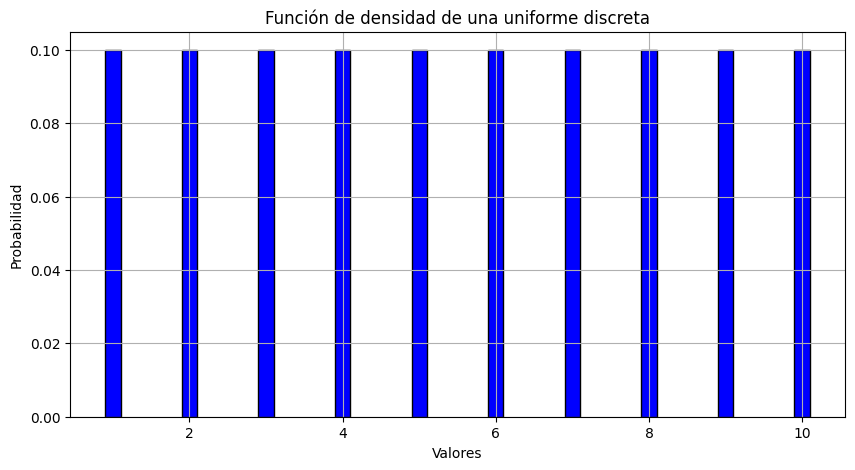

Esperanza: 5.5
Varianza: 8.25
P(X > 80): 0.0


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el rango de la distribuci√≥n uniforme discreta [low, high)
low = 1  # L√≠mite inferior
high = 11  # L√≠mite superior (se usa 11 para incluir 10)

# Crear los valores posibles dentro del rango
x = np.arange(low, high)

# Calcular la funci√≥n de masa de probabilidad
pmf = np.full_like(x, 1 / (high - low), dtype=float)

# Para crear una figura m√°s grande
plt.figure(figsize=(10, 5))

# Graficar pmf
plt.bar(x, pmf, width=0.2, color='b', edgecolor='black')

plt.xlabel('Valores')
plt.ylabel('Probabilidad')
plt.title('Funci√≥n de densidad de una uniforme discreta')
plt.grid(True)

plt.show()  # Mostrar la gr√°fica

# Calcular y mostrar la esperanza y la varianza
esperanza = np.mean(x)
varianza = np.var(x)

print(f"Esperanza: {esperanza}")
print(f"Varianza: {varianza}")

# Calcular y mostrar P(X > 80)
probabilidad_mayor_80 = np.mean(x > 80)
print(f"P(X > 80): {probabilidad_mayor_80}")

### 2.1.2 Variable aleatoria Bernoulli con par√°metro $p \in (0,1)$

Este modelo se aplica a un experiemento cuyo espacio muestral tiene dos resultados
$$ \Omega = \{\text{√©xito} , \text{fracaso}\}$$
y definimos
- $X(\{\text{√©xito}\}) =1$
- $X(\{\text{fracaso}\}) =0$

Las probabilidades asociadas a este modelo son
- $\mathbb{P}(\{\text{√©xito}\}) = p$
- $\mathbb{P}(\{\text{fracaso}\}) = 1-p$
donde $0<p<1$.

La funci√≥n de densidad, est√° definida de la siguiente manera
$$ f_X(x) = \mathbb{P}(X=x) = \begin{cases} p^x(1-p)^{1-x}, \quad \text{si } x\in \{0,1\} \\
0, \quad \text{e.o.c} \end{cases}$$

**Notaci√≥n:** $X\sim Ber(p)$

Mediante la combinaci√≥n de v.a. Bernoulli es posible construir otras v.a.

La esperanza y varianza de $X\sim Ber(p)$, es√° dada por:

$$ \mathbb{E}[X] =\sum_{x=0}^{1} x f_{X}(x) = 0\cdot (1-p) + 1 \cdot p = p $$
y
$$ \mathbb{E}[X^2] =\sum_{x=0}^{1} x^2 f_{X}(x) = 0^2 \cdot (1-p) + 1^2 \cdot p = p $$
entonces
$$ \text{Var}(X) = \mathbb{E}[X^2] - (\mathbb{E}[X])^2  = p - p^2 = p(1-p)$$

La funci√≥n de densidad =  [0.7 0.3]


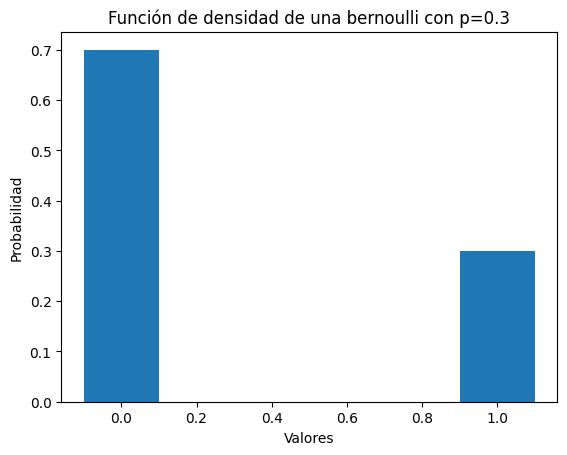

La esperanza es =  0.3
La varianza es =  0.21


In [6]:
from scipy.stats import bernoulli

#Definimos nuestra probabilidad de √©xito
p=0.3

#Defino los posibles valores
x=[0,1]

#Calculamos la funci√≥n de densidad
pmf = bernoulli.pmf(x, p)

print("La funci√≥n de densidad = ", pmf)

#Graficamos la funci√≥n de densidad
plt.bar(x,pmf,width=0.2)
plt.xlabel('Valores')
plt.ylabel('Probabilidad')
plt.title('Funci√≥n de densidad de una bernoulli con p=0.3')
#plt.grid(True)
plt.show() #mostrar el gr√°fica

#Calculo de la esperanza
print("La esperanza es = ", bernoulli.mean(p))

#Calculo de la varianza
print("La varianza es = ", bernoulli.var(p))

### 2.1.3 Variable aleatoria Binomial con par√°metros  $n$ y $p \in (0,1)$

Decimos que una v.a. $X$ tiene distribuci√≥n binomial con par√°metros $n$ y $p$, si su funci√≥n de densidad est√° dada por
$$ f_X(x) = \mathbb{P}(X=x) = \begin{cases} \binom{n}{x}p^x (1-p)^{n-x}, \quad \text{si } x\in \{0,1,...,n\} \\
0, \quad \text{e.o.c} \end{cases}$$
donde $n\in\mathbb{Z}_{+}$ y $0<p<1$.

**Obs:** Los ensayos deben ser independientes.

La esperanza de $X$ es
$$\begin{align*}
\mathbb{E}[X]&= \sum_{x \mathop = 0}^n x \binom n x p^x (1-p)^{n - x}\\
&=\sum_{x \mathop = 1}^n x \binom n x p^x (1-p)^{n - x}\\
&= \sum_{x \mathop = 1}^n n \binom {n - 1} {x - 1} p^x (1-p)^{n - x}\\
&= n p \sum_{x \mathop = 1}^n \binom {n - 1} {x - 1} p^{x - 1} (1-p)^{( {n - 1}) - ( {x - 1}) }\\
&=n p \sum_{j \mathop = 0}^m \binom m j p^j (1-p)^{m - j}\\
&=np.
\end{align*}$$
y
$$ \begin{align*}
\mathbb{E}[X^2]&= \sum_{x \mathop = 0}^n x^2 \binom n x p^x (1-p)^{n - x}\\
&=\sum_{x \mathop = 0}^n x n \binom {n - 1} {x - 1} p^x (1-p)^{n - x}\\
&= n p \sum_{x \mathop = 1}^n x \binom {n - 1} {x - 1} p^{x - 1} (1-p)^{({n - 1}) - ({x - 1}) }\\
&= n p \sum_{j \mathop = 0}^m ({j + 1}) \binom m j p^j (1-p)^{m - j}\\
&=n p \left( {\sum_{j \mathop = 0}^m j \binom m j p^j (1-p)^{m - j} + \sum_{j \mathop = 0}^m \binom m j p^j (1-p)^{m - j} }\right)\\
&=n p \left( {\sum_{j \mathop = 0}^m m \binom {m - 1} {j - 1} p^j (1-p)^{m - j} + \sum_{j \mathop = 0}^m \binom m j p^j (1-p)^{m - j} }\right)\\
&= n p \left( (n - 1) p \sum_{j \mathop = 1}^m \binom {m - 1}{j - 1} p^{j - 1} (1-p)^{( {m - 1}) - ({j - 1}) } + \sum_{j \mathop = 0}^m \binom m j p^j (1-p)^{m - j}\right) \\
&= n p \left( (n - 1) p (p + (1-p))^{m - 1} + (p + (1-p))^m\right)\\
&= n p ((n - 1) p + 1)\\
&= (np)^2 +np(1-p),
\end{align*} $$

Por lo que la varianza de $X$ es
$$\text{Var}(X) = np(1-p) $$

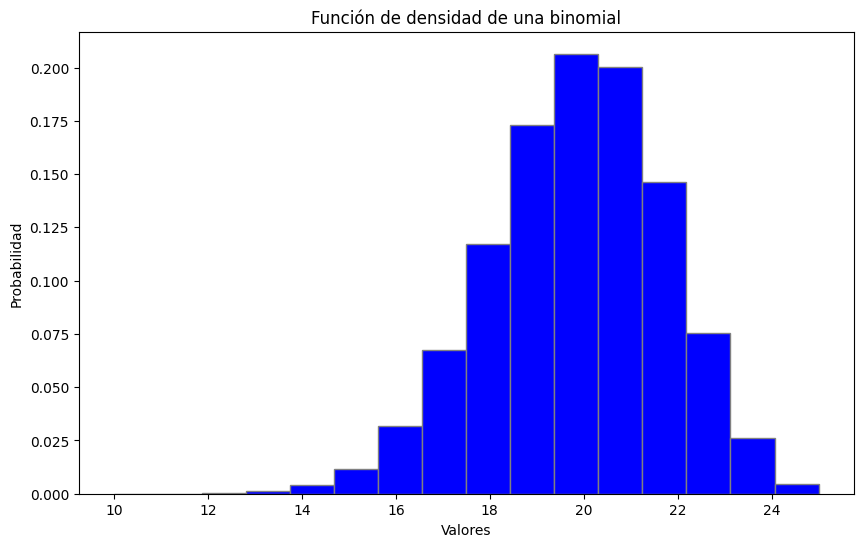

In [7]:
n = 25 # n√∫mero de ensayos bernoulli
p = 0.8 # probabilidad de √©xito
s= 100000 # n√∫mero de muestras

#Vamos a generar numeros aleatorios que siguen una distribuci√≥n binomial
binom_numeros = sps.binom.rvs(n,p,size=s)

#Creamos un histograma
plt.figure(figsize=(10,6))
plt.hist(
    binom_numeros,
    density=True, # Normaliza el area para que sea 1
    bins=len(np.unique(binom_numeros)), # n√∫mero de barras del histograma
    color = "blue",
    edgecolor="grey"
)

plt.xlabel('Valores')
plt.ylabel('Probabilidad')
plt.title('Funci√≥n de densidad de una binomial')
#plt.grid(True)
plt.show() #mostrar el gr√°fica

### 2.1.4 Variable aleatoria Poisson

Es una distribuci√≥n de probabilidad discreta que sirve para calcular la probabilidad de que ocurra un determinado n√∫mero de eventos raros durante un intervalo dado (puede ser tiempo, lingitud, √°rea, etc).

Esta v.a. tomavalores sobre el conjunto $\{0,1,2,...\}$ y tiene un par√°metro $\lambda>0$, el cual representa el n√∫mero de veces que se **espera** que ocurra un evento durante un intervalo dado.

Su funci√≥n de densidad, est√° dado como sigue:
$$ f_X(x) = \mathbb{P}(X=x) = \begin{cases} e^{-\lambda}\frac{\lambda^x}{x!}, \quad \text{si } x\in \{0,1,...\} \\
0, \quad \text{e.o.c} \end{cases}$$

Notemos que $\mathbb{E}[X]=\lambda$ y que $\text{Var}(X)=\lambda$.



**Ejemplo:**

Supongamos que el n√∫mero de accidentes que ocurre en un punto en un d√≠a tiene distribuci√≥n Poisson con par√°metro $\lambda=2$,

- ¬øcu√°l es la probabilidad de que en un d√≠a ocurran m√°s de dos accidentes?
  $$ \begin{align*} \mathbb{P}(X>2) &= 1- \mathbb{P}(X\le 2) \\
    &= 1- [\mathbb{P}(X=0) + \mathbb{P}(X=1) + \mathbb{P}(X=2)] \\
    &= 1- \left[ e^{-2}\frac{2^0}{0!} + e^{-2}\frac{2^1}{1!} + e^{-2}\frac{2^2}{2!} \right] \\
    &= 1 - e^{-2}[1+2+2] = 1-5e^{-2} = 0.3233
    \end{align*} $$
- ¬øcu√°l es la probabilidad de que ocurran m√°s de dos accidentes sabiendo que por lo menos ocurre uno?
  $$ \begin{align*} \mathbb{P}(X>2 \mid X \ge 1) &= \frac{\mathbb{P}(\{X>2\} \cap \{X \ge 1\} )}{\mathbb{P}\{X \ge 1)\}} \\
       &= \frac{\mathbb{P}(\{X>2\})}{\mathbb{P}\{X \ge 1)\}} \\
       & = \frac{.3233}{1-\mathbb{P}(X<1)} = \frac{0.3233}{1-e^{-2}} \frac{0.3233}{.8646} = 0.3739
       \end{align*}

$\color{red}{\text{Ejercicio 3.}}$ Usando el atributo anterior, calcula las siguientes probabilidades:

In [8]:
from scipy.stats import poisson

lambda_poisson = 2
distribucion_poisson = poisson(lambda_poisson)

# C√°lculo de P(X > 2)
probabilidad_mayor_2 = 1 - distribucion_poisson.cdf(2)
print(f"P(X > 2): {probabilidad_mayor_2}")

# C√°lculo de P(X > 2 | X >= 1)
probabilidad_mayor_igual_1 = 1 - distribucion_poisson.cdf(0)
probabilidad_condicional = probabilidad_mayor_2 / probabilidad_mayor_igual_1
print(f"P(X > 2 | X >= 1): {probabilidad_condicional}")

P(X > 2): 0.3233235838169366
P(X > 2 | X >= 1): 0.37392942900133747


### 2.1.5 Aproximaci√≥n de la variable aleatoria Poisson a la variable aleatoria Binomial

La distribuci√≥n de Poisson es una forma l√≠mite de la distribuci√≥n binomial, es decir, es una buena aproximaci√≥n cuando $n$ es suficientemente grande y $p$ suficientemente peque√±a.

$\textbf{Teorema (Poisson).-}$ Sean $S_{n}\sim Bin(n,p_{n})$ bajo el regimen $$\lim_{n\to \infty}np_{n}=\lambda>0.$$
Consideremos la siguiente sucesi√≥n de n√∫meros reales:
$$a_{j}(n,p_n)=\begin{cases}\binom{n}{j}(p_n)^{j}(1-p_{n})^{n-j} & j\leq n\\
0 & j\geq n+1\end{cases}$$

 Entonces,
 $$\lim_{n\to \infty}a_{j}(n,p_n)=a_{j}=e^{-\lambda}\frac{\lambda^{j}}{j!} \ \ \forall j\in \mathbb{N}.$$

 El teorema anterior implica que la distribuci√≥n de Poisson ofrece un modelo probabil√≠stico adecuado para todos aquellos experimentos aleatorios 	en los que las repeticiones son independientes unas de otras y en los 	que s√≥lo hay dos posibles resultados: √©xito o fracaso, con probabilidad de 	√©xito peque√±a, y en los que el inter√©s se centra en conocer el n√∫mero de √©xitos obtenidos al realizar el experimento un n√∫mero suficientemente grande de veces.

Emp√≠ricamente se ha establecido, que la aproximaci√≥n se puede aplicar con seguridad si $n\ge100$, $p\le 0.01$ y $np \le20$.

**Ejemplo:**

Supongamos que la probabilidad de que un producto producido por cierta m√°quina es defectuoso es de $0.1$. ¬øCu√°l es la probabilidad de que un lote de 10 productos contenga a lo m√°s un producto defectuoso?

Sea $X$ el n√∫mero de productos defectuosos, y sabemos que $X$ tiene una distribuci√≥n binomial con par√°metros $n=10$ y $p=0.1$, entonces
\begin{align*}
\mathbb{P}(X\le 1) &= \mathbb{P}(X=0)+\mathbb{P}(X=1) \\ &= \binom{10}{0}(0.1)^{0}(0.9)^{10-0}+\binom{10}{1}(0.1)^{1}(0.9)^{10-1} \\ &= 0.7361
	\end{align*}

Ahora, con la distribuci√≥n Poisson, tenemos que $\lambda=10(0.1)=1$, por lo que
$$\mathbb{P}(X\le 1) = \mathbb{P}(X=0)+\mathbb{P}(X=1) = \frac{e^{-1}1^{0}}{0!}+\frac{e^{-1}1^{1}}{1!} = e^{-1}+e^{-1} =0.7358$$

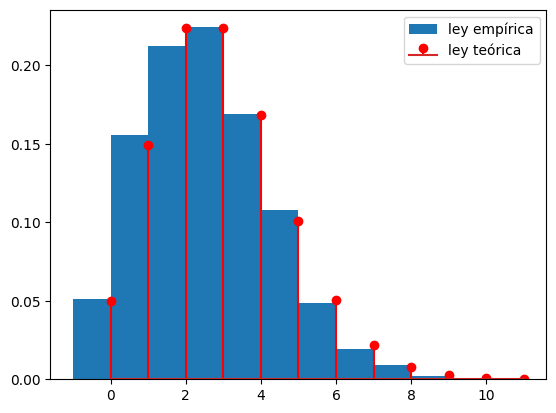

In [9]:
# Simulaci√≥n de la aproximaci√≥n de la Bonomial a la Poisson
param=3 # Parametro de la Poisson que queremos aproximar
n=1000 # Este es el n√∫mero de ensayos en la distribuci√≥n binomial
N=5000 # Este es el n√∫mero de simulaciones que realizaremos.

# Genera una muestra de N valores aleatorios de una distribuci√≥n binomial con par√°metros:
# n = 1000 (n√∫mero de ensayos), p = param/n = 3/1000
X=npr.binomial(n,param/n,N)

# Calcular la frecuencia relativa de los valores simulados
counts = np.bincount(X) / float(N)

# Crear un array de valores posibles
x = np.arange(len(counts))

# Calcular la funci√≥n de masa de probabilidad (FMP) de la distribuci√≥n Poisson te√≥rica
f_x = sps.poisson.pmf(x, param)

plt.close()
plt.bar(x - 0.5, counts, width=1., label="ley emp√≠rica")
p2 = plt.stem(x, f_x, "r", label="ley te√≥rica")
plt.legend()
plt.show()

### 2.1.6 Variable aleatoria Geom√©trica con par√°metro $p\in (0,1)$.

Esta variable aleatoria cuenta el n√∫mero de fracasos antes del primer √©xito en ensayos bernoulli independientes con par√°metro $0<p<1$, y su funci√≥n de masa de probabilidades est√° dada por:
$$f_{X}(x)=\begin{cases}
	p(1-p)^{x-1} &\quad \text{si } x=1,2,\dots \\
	\qquad 0 &\quad \text{en otro caso}  
\end{cases}$$


**Notaci√≥n:** $X\sim Geo(p)$

La cual es una funci√≥n de densidad ya que:
* $0\le f_{X}(x)\le 1$ para toda $x$.
* $$\begin{align*}
	\sum_{x\in R_{X}}f_{X}(x) &= \sum_{x=1}^{\infty}(1-p)^{x-1}p \\
	&= p\sum_{y=0}^{\infty}(1-p)^{y} \\
	&= p\left(\frac{1}{1-(1-p)}\right) = 1
    \end{align*}$$

Si por el contrario queremos contar el n√∫mero de √©xitos antes del primer fracaso, tenemos que la funci√≥n de est√° dada por:
$$f_{X}(x)=\begin{cases}
	p^{x}(1-p) &\quad \text{si } x=0,1,2,\dots \\
	\qquad 0 &\quad \text{en otro caso}  
\end{cases}$$

Para calcular la esperanza y varianza de $X$, necesitamos del siguiente lema:

**Lema 1.** Sea $x$ un n√∫mero real tal que $‚îÇx‚îÇ<1$. Entonces,
$$\sum_{k=1}^{\infty}kx^{k-1}=\frac{1}{(1-x)^2}.$$
**Demostraci√≥n.** Se tiene que
$$\frac{d}{dx}\sum_{k=1}^{\infty}x^{k}=\sum_{k=1}^{\infty}kx^{k-1}.$$
Adem√°s,
$$\sum_{k=1}^{\infty}x^{k}=\frac{x}{1-x}.$$
Por lo tanto,
$$\frac{d}{dx}\frac{x}{1-x}=\frac{1}{(1-x)^2}.$$

Como corolario,
$$\sum_{k=1}^{\infty}k(k+1)x^{k-1}=\frac{2}{(1-x)^2}.$$
En efecto,
$$\frac{d}{dx}\sum_{k=1}^{\infty}(k+1)x^{k}=\sum_{k=1}^{\infty}k(k+1)x^{k-1}.$$
Ahora,
$$\sum_{k=1}^{\infty}(k+1)x^{k}=\sum_{m=2}^{\infty}mx^{m-1}=\frac{1}{(1-x)^2}-1.$$

Usando estos resultados, se tiene que la esperanza de $X$ es:
$$\begin{align*}
\mathbb{E}[X]&= \sum_{x=1}^{\infty} x p(1-p)^{x - 1}\\
&= p \frac 1 {(1 - (1-p))^2}\\
&=  \frac p {p^2}\\
&=\frac{1}{p}
\end{align*}$$
y calculamos,
$$ \begin{align*}
\mathbb{E}[X^2]&= \sum_{x=1}^{\infty} x^{2}p(1-p)^{x-1}\\
&=\sum_{x=1}^{\infty}x(x+1)(1-p)^{x-1}p-\sum_{x=1}^{\infty}p(1-p)^{x-1}
\end{align*}$$

Por el Lema 1, se tiene
$$\mathbb{E}[X^2]=p\frac{2}{p^3}-\frac{1}{p}=\frac{2}{p^2}-\frac{1}{p}.$$

Por lo tanto,
$$\text{Var}(X)=\frac{2}{p^2}-\frac{1}{p}-\frac{1}{p^2}=\frac{1-p}{p^2}.$$

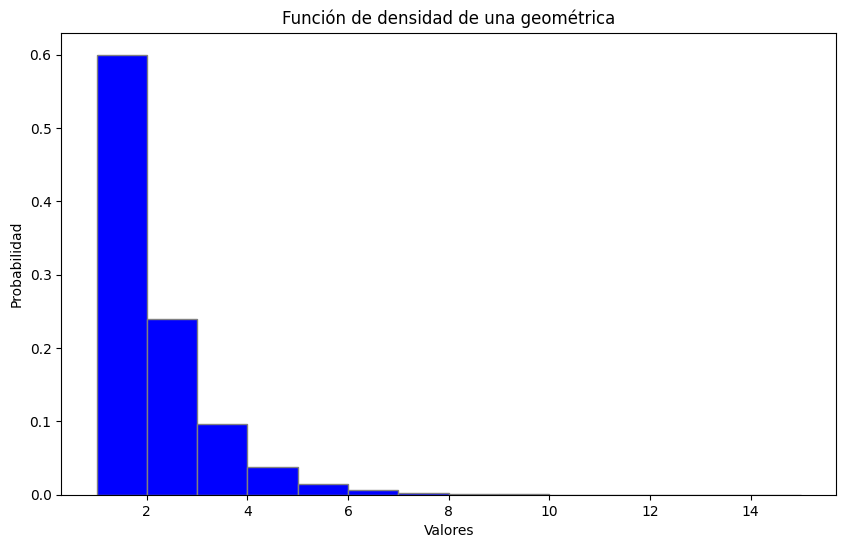

In [10]:
p = 0.6 # probabilidad de √©xito
s= 100000 # n√∫mero de muestras

random.seed(3) #fijar una semilla
#Vamos a generar numeros aleatorios que siguen una distribuci√≥n geom√©trica
geom_numeros = sps.geom.rvs(p,size=s)

#Creamos un histograma
plt.figure(figsize=(10,6))
plt.hist(
    geom_numeros,
    density=True, # Normaliza el area para que sea 1
    bins=len(np.unique(geom_numeros)), # n√∫mero de barras del histograma
    color = "blue",
    edgecolor="grey"
)

plt.xlabel('Valores')
plt.ylabel('Probabilidad')
plt.title('Funci√≥n de densidad de una geom√©trica')
plt.show() #mostrar el gr√°fica

### 2.1.7 Variable aleatoria Binomial Negativa con par√°metros $r\geq 1$ y $p\in (0,1)$.

Supongamos que se realizan ensayos independientes, cada uno con probabilidad $0<p<1$ de ser un √©xito, hasta obtener un total de $r$ √©xitos acumulados. Sea $X$ el n√∫mero de ensayos que se requieren, entonces su funci√≥n de masa de probabilidades est√° dada por:
$$ f_{X}(x)=\begin{cases}
	\binom{x-1}{r-1}p^{r}(1-p)^{x-r} &\quad \text{si } x=r,r+1,\dots \\
	\qquad 0 &\quad \text{en otro caso}  
\end{cases}$$

**Notaci√≥n.** $X\sim \text{BN}(r,p)$.

Se tiene que
$$ \mathbb{E}[X]=\frac{r}{p}$$
y
$$ \text{Var}[X]=\frac{r(1-p)}{p^2}.$$

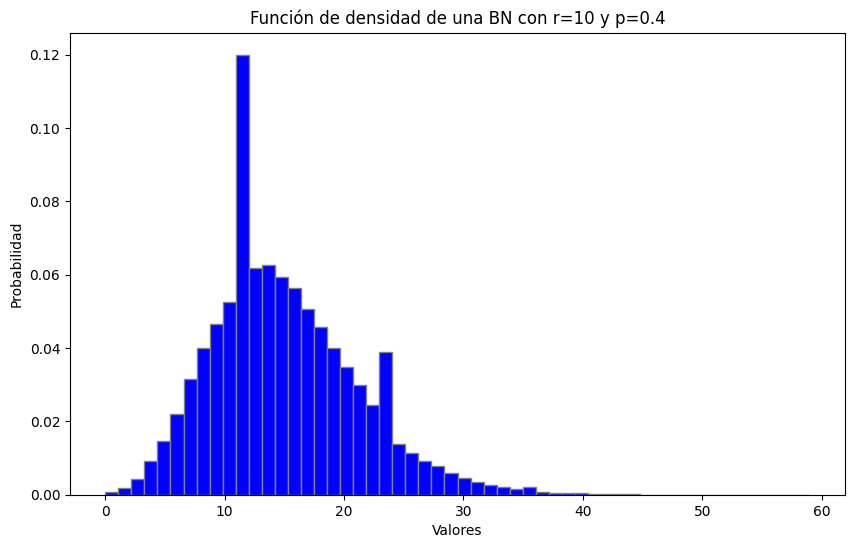

In [11]:
r = 10
p = 0.4 # probabilidad de √©xito
s= 100000 # n√∫mero de muestras

random.seed(3) #fijar una semilla
#Vamos a generar numeros aleatorios que siguen una distribuci√≥n geom√©trica
nbinom_numeros = sps.nbinom.rvs(r,p,size=s)

#Creamos un histograma
plt.figure(figsize=(10,6))
plt.hist(
    nbinom_numeros,
    density=True, # Normaliza el area para que sea 1
    bins=len(np.unique(nbinom_numeros)), # n√∫mero de barras del histograma
    color = "blue",
    edgecolor="grey"
)

plt.xlabel('Valores')
plt.ylabel('Probabilidad')
plt.title('Funci√≥n de densidad de una BN con r=10 y p=0.4')
plt.show() #mostrar el gr√°fica

$\color{red}{\text{Ejercicio 4.}}$ Un examen de Estad√≠stica consta de 20 preguntas tipo test y se conoce de experiencias
anteriores que un alumno tiene probabilidad 0.7 de contestar bien cada pregunta. Obtener:

a) La probabilidad de que la primera pregunta que contesta bien sea la cuarta.

b) Sabiendo que para aprobar el examen es necesario contestar bien a 10 preguntas, ¬øcu√°l es la probabilidad de que apruebe al contestar la pregunta duod√©cima?

In [12]:
from scipy.stats import geom, binom

# Datos del problema
prob_correcta = 0.7  # Probabilidad de contestar bien cada pregunta
preguntas_totales = 20  # N√∫mero total de preguntas

# a) Probabilidad de que la primera pregunta correcta sea la cuarta
pregunta_objetivo_a = 4  # La cuarta pregunta
prob_a = geom.pmf(pregunta_objetivo_a, prob_correcta)
print(f"a) Probabilidad de que la primera pregunta correcta sea la cuarta: {prob_a}")

# b) Probabilidad de aprobar en la pregunta duod√©cima
preguntas_necesarias_aprobar = 10  # Necesita 10 correctas para aprobar
preguntas_b = 12  # Pregunta duod√©cima

# Calcular la probabilidad de 9 correctas en las primeras 11 preguntas
prob_b = binom.pmf(preguntas_necesarias_aprobar - 1, preguntas_b - 1, prob_correcta)

# Multiplicar por la probabilidad de que la pregunta 12 sea correcta
prob_c = prob_b * prob_correcta
print(f"b) Probabilidad de aprobar en la pregunta duod√©cima: {prob_c}")

a) Probabilidad de que la primera pregunta correcta sea la cuarta: 0.018900000000000007
b) Probabilidad de aprobar en la pregunta duod√©cima: 0.13982524825499987


$\color{red}{\text{Ejercicio 5.}}$ Investigue sobre el problema de la caja de cerillos de Banach y explique su soluci√≥n.

 **Problema de la caja de cerillos de Banach**

Un matem√°tico lleva siempre consigo dos cajas de cerillos, una en el bolsillo derecho y otra en el izquierdo. Cada vez que necesita un cerillo, elige al azar uno de los dos bolsillos. Supongamos que inicialmente cada caja contiene N cerillos. ¬øCu√°l es la probabilidad de que, cuando el matem√°tico descubre que una de las cajas est√° vac√≠a, la otra caja contenga exactamente k cerillos?

Este problema se resuelve con la distribuci√≥n binomial negativa porque esta distribuci√≥n nos dice el n√∫mero de intentos antes de obtener exito lo que aqui podr√≠amos traducir como exito es que una de las cajas de cerillos quede vac√≠a , y el n√∫mero de intentos podr√≠amos traducirla como el numero de cerillos que sac√≥

**An√°lisis del problema**

La clave del problema est√° en modelar el proceso como una caminata aleatoria sim√©trica, donde cada paso corresponde a extraer un cerillo de alguno de los bolsillos con probabilidad \( p = 0.5 \). Cuando uno de los bolsillos se vac√≠a, el proceso termina.

Para simplificar el an√°lisis, consideramos uno de los bolsillos con una cantidad ilimitada de cerillos. Sea \( M \) el n√∫mero de cerillos extra√≠dos de este bolsillo antes de vaciar el otro. Este n√∫mero sigue una **distribuci√≥n binomial negativa**, donde:

- \( p = 0.5 \) es la probabilidad de elegir cada bolsillo.
- Se requieren \( N + 1 \) fallos (vaciar un bolsillo) para terminar.

La probabilidad de que queden exactamente \( k \) cerillos en el bolsillo ilimitado cuando el otro se vac√≠a es:

$$ P[K = k] = {\binom{2N - k}{N - k}} \left(\frac{1}{2}\right)^{2N - k} $$

Este resultado se interpreta como la probabilidad de alcanzar un estado l√≠mite donde uno de los bolsillos queda vac√≠o y el otro tiene \( k \) cerillos restantes.

**Esperanza matem√°tica**

Usando aproximaciones avanzadas, como la **aproximaci√≥n de Stirling**, se demuestra que el valor esperado del n√∫mero de cerillos restantes es:

$$ E(K) \approx 2\sqrt{\frac{N}{\pi}} - 1 $$

Este resultado refleja la relaci√≥n entre la magnitud inicial \( N \) y la variabilidad inherente del proceso estoc√°stico.

El problema de la caja de cerillos de Banach es relevante en teor√≠a de colas, procesos de Poisson y an√°lisis de cadenas de Markov, mostrando c√≥mo se distribuyen los recursos finitos bajo selecci√≥n aleatoria.

### 2.1.8 Variable aleatoria Hipergeom√©trica con par√°metros $n,N,m$.

Supongamos que se elige, sin reemplazo, una muestra de tama√±o $n$ de una urna que contiene $N$ bolas, de las cuales $m$ son rojas y $N-m$ son verdes. Sea $X$ el n√∫mero de bolas rojas seleccionadas, entonces su funci√≥n de masa de probabilidades est√° dada por:
$$ f_{X}(x)=
	\frac{\binom{m}{x}\binom{N-m}{n-x}}{\binom{N}{n}} \quad \text{si } x=0,1,\dots, n $$

**Notaci√≥n.** $X\sim \text{Hiper}(n,N,m)$.

Se tiene que
$$ \mathbb{E}[X]=\frac{nm}{N}$$
y
$$ \text{Var}[X]=\frac{nm}{N}\left[\frac{(n-1)(m-1)}{N-1}+1-\frac{nm}{N} \right].$$

**Nota.** Si $x\leq n$ y $X\sim \text{Hiper}(n,N,m)$, cuando $p=\frac{m}{N}$ y $m,N$ son muy grandes con respecto a $n$ y $x$:
$$\mathbb{P}(X=x)\approx \binom{n}{x}p^{x}(1-p)^{n-x}.$$

$\color{red}{\text{Ejercicio 6.}}$ Replicar la grafica de la funci√≥n de densidad

Supongamos que se elige, sin reemplazo, una muestra de tama√±o $n$ de una urna que contiene $N$ bolas, de las cuales $m$ son rojas y $N-m$ son verdes. Sea $X$ el n√∫mero de bolas rojas seleccionadas, entonces su funci√≥n de masa de probabilidades est√° dada por:
$$ f_{X}(x)=
	\frac{\binom{m}{x}\binom{N-m}{n-x}}{\binom{N}{n}} \quad \text{si } x=0,1,\dots, n $$

**Notaci√≥n.** $X\sim \text{Hiper}(n,N,m)$.

Se tiene que
$$ \mathbb{E}[X]=\frac{nm}{N}$$
y
$$ \text{Var}[X]=\frac{nm}{N}\left[\frac{(n-1)(m-1)}{N-1}+1-\frac{nm}{N} \right].$$

**Nota.** Si $x\leq n$ y $X\sim \text{Hiper}(n,N,m)$, cuando $p=\frac{m}{N}$ y $m,N$ son muy grandes con respecto a $n$ y $x$:
$$\mathbb{P}(X=x)\approx \binom{n}{x}p^{x}(1-p)^{n-x}.$$

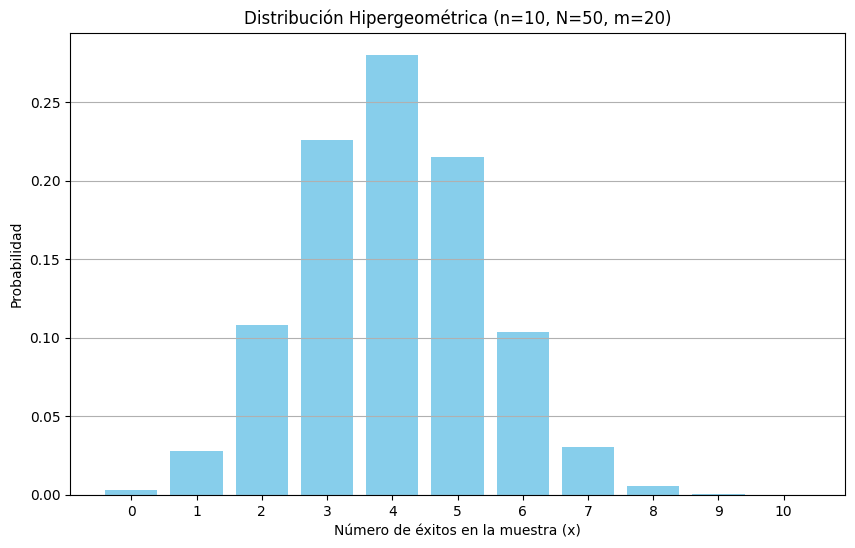

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

def hipergeometrica_pmf(x, n, N, m):
    """Calcula la PMF de la distribuci√≥n hipergeom√©trica."""
    numerador = comb(m, x, exact=True) * comb(N - m, n - x, exact=True)
    denominador = comb(N, n, exact=True)
    return numerador / denominador

def graficar_hipergeometrica(n, N, m):
    """Grafica la PMF de la distribuci√≥n hipergeom√©trica."""
    x_values = np.arange(0, min(n, m) + 1)
    pmf_values = [hipergeometrica_pmf(x, n, N, m) for x in x_values]

    plt.figure(figsize=(10, 6))
    plt.bar(x_values, pmf_values, color='skyblue')
    plt.xlabel('N√∫mero de √©xitos en la muestra (x)')
    plt.ylabel('Probabilidad')
    plt.title(f'Distribuci√≥n Hipergeom√©trica (n={n}, N={N}, m={m})')
    plt.xticks(x_values)
    plt.grid(axis='y')
    plt.show()

# Ejemplo de uso
n = 10  # Tama√±o de la muestra
N = 50  # Tama√±o de la poblaci√≥n
m = 20  # N√∫mero de √©xitos en la poblaci√≥n

graficar_hipergeometrica(n, N, m)

$\color{red}{\text{Ejercicio 7.}}$ Una compa√±√≠a petrolera realiza un estudio geol√≥gico que indica que un pozo petrolero exploratorio deber√≠a tener un 20% de posibilidades de encontrar petr√≥leo.

- ¬øCu√°l es la probabilidad de que el primer pozo se produzca en el tercer pozo perforado?

- ¬øCu√°l es la probabilidad de que el tercer pozo se produzca en el s√©ptimo pozo perforado?

- ¬øCu√°l es la media y la varianza del n√∫mero de pozos que se deben perforar si la compa√±√≠a petrolera quiere establecer tres pozos productores?

In [14]:
from scipy.stats import geom, nbinom

# Datos del problema
prob_exito = 0.2  # Probabilidad de encontrar petr√≥leo

# a) Probabilidad de que el primer pozo se produzca en el tercer pozo
prob_a = geom.pmf(3, prob_exito)
print(f"a) Probabilidad: {prob_a}")

# b) Probabilidad de que el tercer pozo se produzca en el s√©ptimo pozo
prob_b = nbinom.pmf(4, 3, prob_exito)  # nbinom.pmf(k-r, r, p)
print(f"b) Probabilidad: {prob_b}")

# c) Media y varianza del n√∫mero de pozos para 3 √©xitos
media = 3 / prob_exito
varianza = (3 * (1 - prob_exito)) / (prob_exito ** 2)
print(f"c) Media: {media}, Varianza: {varianza}")

a) Probabilidad: 0.12800000000000003
b) Probabilidad: 0.04915200000000004
c) Media: 15.0, Varianza: 60.0


## 2.2 Variables Aleatorias Continuas

Una variable aleatoria continua es aquella que puede tomar cualquier valor dentro de un intervalo de n√∫meros reales.

Puede asumir infinitos valores posibles dentro de un rango determinado o incluso en todo R.

**Definici√≥n.**

Una variable aleatoria absolutamente continua es aquella para la cual existe una funci√≥n $f_X$ no negativa, llamada funci√≥n de densidad, tal que:
$$
F_X(x) = \mathbb{P}(X\leq x) = \int_{-\infty}^{x} f_X(y) dy, \quad x\in \mathbb{R}
$$

**Lema.**

Sea $F_X$ una funci√≥n de distribuci√≥n. Supongamos que $F_X$ es derivable y que su derivada es continua en $(a, b)$, donde:

$ a = \inf \{ x \in \mathbb{R} \mid F_X(x) > 0 \}, \quad b = \sup \{ x \in \mathbb{R} \mid F_X(x) < 1 \}$

entonces, la funci√≥n de densidad se puede obtener como:
$$ f_X(x) =
\begin{cases}
F'_X(x), & \text{si } x \in (a, b), \\
0, & \text{e.o.c.}
\end{cases}$$

Es decir,
$$ \frac{dF_X(x)}{dx} = f_X(x)$$

**Propiedades:**


1.   Se describe con una funci√≥n de densidad de probabilidad (f.d.p.), no con probabilidades directas: Indica qu√© tan probable es que la variable tome valores alrededor de un punto, pero no una probabilidad exacta (porque la probabilidad puntual en una variable continua siempre es 0).
$$f(x)$$
2.   La probabilidad de un intervalo se obtiene como el √°rea bajo la curva de la funci√≥n de densidad:
$$\sum_{i}^{}P(X=x_i)=1$$
3. La funci√≥n de densidad debe cumplir dos condiciones:
- No negatividad:
$$f(x) \geq 0 $$
- √Årea total bajo la curva a 1:
$$\int_{-‚àû}^{‚àû} f(x)dx=1$$
4. La probabilidad de que la variable tome un valor exacto es cero: Porque hay infinitos valores posibles en cualquier intervalor
$$P(X=a)=0$$
5. Esperanza: Para calcular la esperanza, se utiliza
$$E[X]=‚à´x‚ãÖf(x)dx$$
6. Varianza: Para calcular la varianza de una v.a discreta, se utiliza
  $$ Var(X) = E[X^2] - (E[X])^2 =‚à´(x-E[X])^2¬∑f(x)dx $$

### 2.2.1 Distribuci√≥n Uniforme

Es una distribuci√≥n de probabilidad donde todos los valores dentro de un intervalo tienen la misma probabilidad de ocurrir.

* Uniforme Discreta: Cuando toma un n√∫mero finito de valores
* Uniforme Continua: Cuando puede tomar cualquier valor real dentro de un intervalo [a,b]

**Funci√≥n de Densidad:**
$$f(x)=f(x) =
\begin{cases}
\frac{1}{b-a}, & \text{si } a \leq x \leq b \\
0, & \text{en otro caso}
\end{cases}$$

**Ejercicio:**

Un alumno se dirige a la biblioteca para solicitar el pr√©stamo de un libro y decide que no puede esperar m√°s de $10$ minutos en ser atendido. Supongamos que el bibliotecario tarda por lo menos $0.5$ minutos en atender a una persona, entonces es razonable proponer una distribuci√≥n uniforme en el intervalo $[0.5,10]$ para modelar el comportamiento de la variable $X$ que es el tiempo en ser atendido (en  minutos).

- Da la funci√≥n de densidad y gr√°fica.
- ¬øCu√°l es la probabilidad de que el tiempo en ser atendido sea mayor a $5$ minutos pero menor a $8$ minutos?
- ¬øCu√°l es la esperanza y varianza?
- Calcula la funci√≥n de distribuci√≥n y gr√°ficala, y con ella calcula: $\mathbb{P}(2.51\le X \le 7.99)$.

Probabilidad de que 5 < X < 8: 0.3158
Esperanza (E[X]): 5.25
Varianza (Var[X]): 7.52


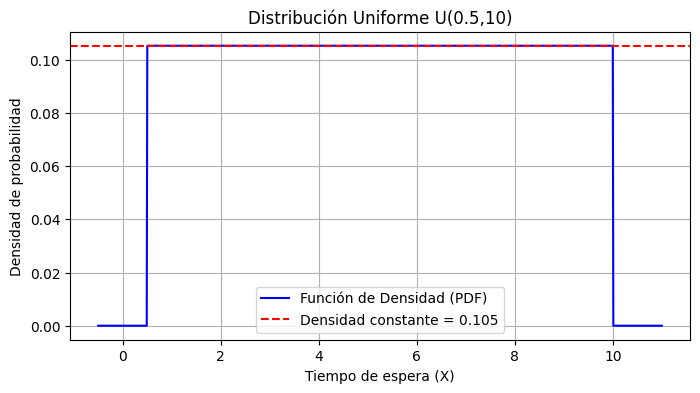

Probabilidad de que 2.51 ‚â§ X ‚â§ 7.99: 0.5768


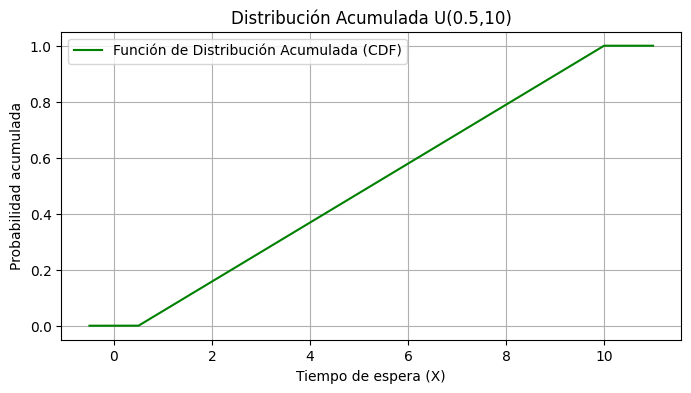

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

# Definir los par√°metros de la distribuci√≥n uniforme
a, b = 0.5, 10  # Intervalo [0.5, 10]

# Crear la funci√≥n de densidad (PDF)
x = np.linspace(a - 1, b + 1, 1000)  # Valores en un rango mayor para visualizar mejor
pdf = uniform.pdf(x, loc=a, scale=b-a)

# ---- 2. Calcular P(5 < X < 8) ----
prob_5_8 = uniform.cdf(8, loc=a, scale=b-a) - uniform.cdf(5, loc=a, scale=b-a)
print(f"Probabilidad de que 5 < X < 8: {prob_5_8:.4f}")

# ---- 3. Calcular esperanza y varianza ----
esperanza = (a + b) / 2
varianza = ((b - a) ** 2) / 12
print(f"Esperanza (E[X]): {esperanza:.2f}")
print(f"Varianza (Var[X]): {varianza:.2f}")

# Graficar la funci√≥n de densidad
plt.figure(figsize=(8, 4))
plt.plot(x, pdf, label='Funci√≥n de Densidad (PDF)', color='b')
plt.axhline(y=1/(b-a), color='r', linestyle='--', label=f'Densidad constante = {1/(b-a):.3f}')
plt.xlabel("Tiempo de espera (X)")
plt.ylabel("Densidad de probabilidad")
plt.title("Distribuci√≥n Uniforme U(0.5,10)")
plt.legend()
plt.grid()
plt.show()

# ---- 4. Funci√≥n de distribuci√≥n acumulada (CDF) y P(2.51 ‚â§ X ‚â§ 7.99) ----
x_cdf = np.linspace(a - 1, b + 1, 1000)
cdf = uniform.cdf(x_cdf, loc=a, scale=b-a)

# Calcular P(2.51 ‚â§ X ‚â§ 7.99)
prob_2_51_7_99 = uniform.cdf(7.99, loc=a, scale=b-a) - uniform.cdf(2.51, loc=a, scale=b-a)
print(f"Probabilidad de que 2.51 ‚â§ X ‚â§ 7.99: {prob_2_51_7_99:.4f}")

# Graficar la funci√≥n de distribuci√≥n acumulada (CDF)
plt.figure(figsize=(8, 4))
plt.plot(x_cdf, cdf, label='Funci√≥n de Distribuci√≥n Acumulada (CDF)', color='g')
plt.xlabel("Tiempo de espera (X)")
plt.ylabel("Probabilidad acumulada")
plt.title("Distribuci√≥n Acumulada U(0.5,10)")
plt.legend()
plt.grid()
plt.show()

### 2.2.2 Variable aleatoria uniforme sobre $(a,b)$

Una variable aleatoria $X$ se dice que tiene distribuci√≥n uniforme continua  en el intervalo $(a,b)$ con $a,b\in\mathbb{R}$, si su funci√≥n de densidad esta dada por:
$$f_{X}(x)=\begin{cases}
	\frac{1}{b-a} &\quad \text{si } a< x < b\\
	\qquad 0 &\quad \text{en otro caso}  
\end{cases}$$

**Notaci√≥n.** $X\sim \text{Unif}(a,b)$ $\text{Unif}[a,b]$

**Obs:**
* La distribuci√≥n uniforme continua en $(a,b)$ es sim√©trica.
* A los intervalos de la misma longitud contenidos en $(a,b)$ se les asigna la misma probabilidad. Esto se representa gr√°ficamente con la probabilidad de que $X$ se encuentre en el intervalo $(s,t)$:


La funci√≥n de distribuci√≥n de $X\sim Unif((a,b))$ esta dada por:
$$F_{X}(x)=\begin{cases}
	 0 &\quad \text{si } x\le a \\
	\frac{x-a}{b-a} &\quad \text{si } a<x<b\\
	 1 &\quad \text{si } x\ge b  
\end{cases}$$

La esperanza de una variable aleatoria uniforme es la siguiente,
$$\begin{align*}
\mathbb{E}[X] &= \int_{a}^{b}xf_{X}(x)dx = \int_{a}^{b}x\frac{1}{b-a}dx = \frac{1}{b-a}\int_{a}^{b}xdx  = \frac{1}{b-a}\left[\frac{x^{2}}{2}\right]_{a}^{b} \\ &= \frac{1}{b-a}\left[\frac{b^{2}}{2}-\frac{a^{2}}{2}\right] =  \frac{b^{2}-a^{2}}{2(b-a)} = \frac{(b-a)(b+a)}{2(b-a)} = \frac{a+b}{2}.
\end{align*}$$

Para calcular la varianza, primero vamos a calcular el segundo momento
$$\begin{align*}
\mathbb{E}[X^{2}] &= \int_{a}^{b}x^{2}f_{X}(x)dx = \int_{a}^{b}x^{2}\frac{1}{b-a}dx = \frac{1}{b-a}\int_{a}^{b}x^{2}dx \\ &= \frac{1}{b-a}\left[\frac{x^{3}}{3}\right]_{a}^{b} = \frac{1}{b-a}\left[\frac{b^{3}}{3}-\frac{a^{3}}{3}\right] =  \frac{b^{3}-a^{3}}{3(b-a)}.
\end{align*}$$

Por lo que se tiene lo siguiente

$$Var(X) = \mathbb{E}[X^{2}]-(\mathbb{E}[X])^{2} =\frac{b^{3}-a^{3}}{3(b-a)}-\left(\frac{a+b}{2}\right)^{2} = \frac{(b-a)^{2}}{12}.$$

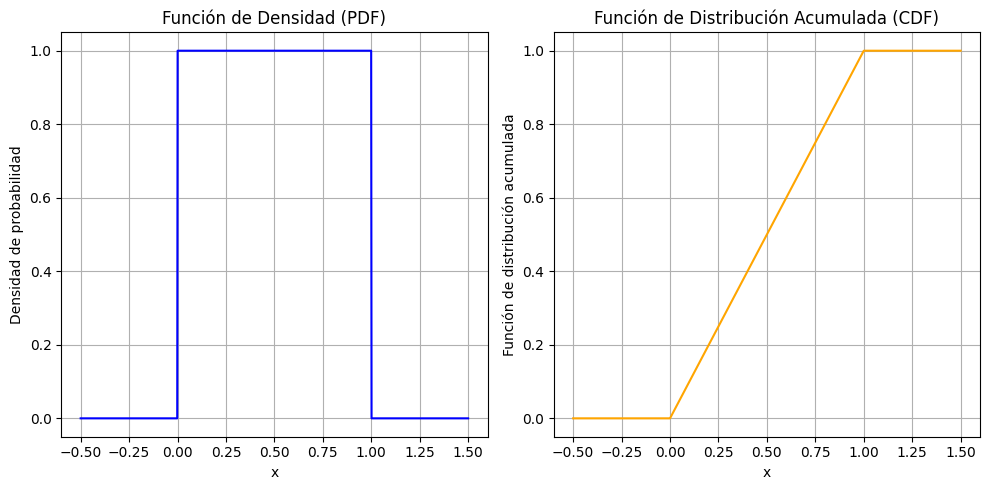

In [17]:
# Par√°metros de la distribuci√≥n uniforme
a = 0  # l√≠mite inferior
b = 1  # l√≠mite superior

# Definimos las funciones de densidad y distribuci√≥n
# Funci√≥n de densidad (pdf) de la distribuci√≥n uniforme
def uniform_pdf(x, a, b):
    return np.where((x >= a) & (x <= b), 1 / (b - a), 0)

# Funci√≥n de distribuci√≥n (cdf) de la distribuci√≥n uniforme
def uniform_cdf(x, a, b):
    return np.where(x < a, 0, np.where(x > b, 1, (x - a) / (b - a)))

# Generar valores de x
x = np.linspace(-0.5, 1.5, 1000)

# Calcular la funci√≥n densidad
pdf_values = uniform_pdf(x, a, b)

# Calcular la funci√≥n de distribuci√≥n
cdf_values = uniform_cdf(x, a, b)

# Graficar la PDF
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x, pdf_values, label='PDF', color='blue')
plt.xlabel('x')
plt.ylabel('Densidad de probabilidad')
plt.title('Funci√≥n de Densidad (PDF)')
plt.grid(True)

# Graficar la CDF
plt.subplot(1, 2, 2)
plt.plot(x, cdf_values, label='CDF', color='orange')
plt.xlabel('x')
plt.ylabel('Funci√≥n de distribuci√≥n acumulada')
plt.title('Funci√≥n de Distribuci√≥n Acumulada (CDF)')
plt.grid(True)

plt.tight_layout()
plt.show()

### 2.2.3 Variable aleatoria exponencial con par√°metro $\lambda>0$.

La distribuci√≥n exponencial es una de las distribuciones continuas m√°s utilizadas. A menudo se utiliza para modelar el tiempo transcurrido entre eventos.  

Se dice que la variable aleatoria $X$ tiene distribuci√≥n exponecial de par√°metro $\lambda>0$, si su funci√≥n de densidad est√° dada por:
$$f_{X}(x)=\begin{cases}
\lambda e^{-\lambda x} & x>0\\
0 & \text{en otro caso}
\end{cases}$$


**Notaci√≥n**. $X\sim \exp(\lambda).$

**Ejemplo:**

Consideremos la variable aleatoria $X$ como el tiempo (en minutos) entre la llegada de dos personas a la fila  de una sucuarsal bancaria.

Adicionalmente, el banco ha determinado que solo el $10\%$ de las veces, el tiempo que transcurre entre la llegada de una persona y otra es mayor a dos minutos.

Esto permite calcular el valor de $\lambda$, ya que
$$\mathbb{P}(X>2)=0.1$$
entonces
$$1-\mathbb{P}(X\le 2) = 1-F_{X}(2) = 0.1$$

NOtemos que si $X\sim Exp\left( \lambda \right)$, entonces $F_{X})(x) = 1-e^{-\frac{x}{\lambda}}$

Por lo que $F_{X}(2)= 1-e^{\frac{-2}{\lambda}} =0.9$, entonces
$e^{\frac{-2}{\lambda}}=0.1$. Por lo que
$$\frac{-2}{\lambda}=\ln(0.1) \Rightarrow \lambda=0.87$$
Por lo tanto $X\sim\exp(0.87)$.

**Teorema:**

Sea $\varepsilon>0$ y $Y_{\epsilon}\sim Geo(p_{\varepsilon})$. Supongamos que nos encontramos en el regimen:
$$\lim_{\varepsilon\to 0}p_{\varepsilon}=0 \qquad \text{y} \qquad \varepsilon^{-1}p_{\varepsilon}\sim \lambda>0$$
   Sea $X_{\varepsilon}:=\varepsilon Y_{\varepsilon}$. Entonces,
   $$\lim_{\varepsilon\to 0}F_{X_{\varepsilon}}(x)=F_{X}(x),$$
   en donde $X\sim \exp(\lambda)$. Este tambi√©n es un resultado de convergencia en ley.

### 2.2.4 Variable aleatoria normal con par√°metros media $\mu$ y varianza $\sigma^{2}$.

La distribuci√≥n normal, tambi√©n es llamada distribuci√≥n gaussiana, esta distribuci√≥n radica en que permite modelar numerosos fen√≥menos naturales, sociales y psicol√≥gicos.

Adem√°s, esta distribuci√≥n juega un papel de suma importancia en la inferencia estad√≠stica.

Se dice que la variable aleatoria $X$ tiene distribuci√≥n normal de par√°metros $\mu$ y $\sigma^{2}$, donde $\mu,\sigma\in\mathbb{R}$ y $\sigma>0$, si su funci√≥n de densidad est√° dada por:
$$f_{X}(x)=\begin{cases}
	\frac{1}{\sqrt{2\pi\sigma^{2}}}e^{-\frac{(x-\mu)^{2}}{2\sigma^{2}}} &\quad \text{si }  x \in\mathbb{R} \\
	\qquad 0 &\quad \text{e.o.c}  
\end{cases}$$

**Notaci√≥n.** $X\sim N(\mu,\sigma^{2})$


Tal curva (**la campana de Gauss**) es una funci√≥n que depende de los par√°metros $\mu$ y $\sigma^{2}$.


**Observaci√≥n:** El par√°metro $\mu$ se llama *media* y el  par√°metro $\sigma^{2}$ se llama *varianza*.

La funci√≥n de densidad definida anteriormente es efecto funci√≥n de densidad, ya que
$$\int_{\mathbb{R}}f_{X}(x)dx = \int_{\mathbb{R}}\frac{1}{\sqrt{2\pi\sigma^{2}}}e^{-\frac{(x-m)^{2}}{2\sigma^{2}}}  = 1 $$

Variable aleatoria normal con par√°metros  0  y  1 .
La ley de $Z\sim N(0,1)$ est√° dada por la funci√≥n de densidad
$$
f_{Z}(z) = \frac{1}{\sqrt{2\pi}}e^{-\frac{z^2}{2}},
$$
para $z\in \mathbb{R}$.

La funci√≥n de distribuci√≥n de una variable aleatoria $X\sim N(\mu,\sigma^{2})$ est√° dada por:
$$F_{X}(x) = \int_{-\infty}^{x}\frac{1}{\sqrt{2\pi\sigma^{2}}}e^{-\frac{(y-\mu)^{2}}{2\sigma^{2}}}dy$$

Esta nos proporciona la probabilidad de que $X$ tome calores menores o iguales a un valor espec√≠fico $x$, y corresponde al √°rea bajo la curva en el intervalo $(-\infty,x]$

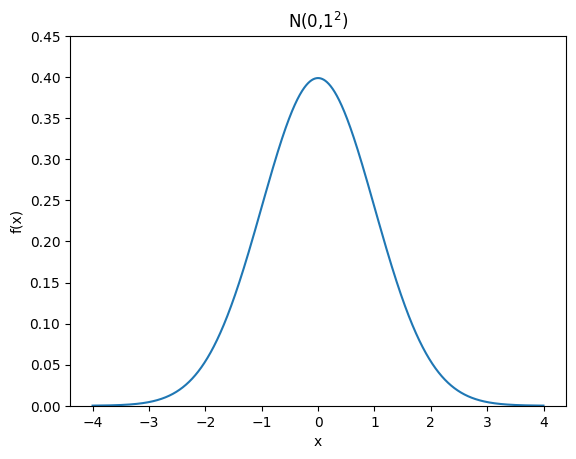

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
fig, ax = plt.subplots()
x= np.arange(-4,4,0.001) #generar valores de x
ax.set_title('N(0,$1^2$)')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.plot(x, norm.pdf(x))
ax.set_ylim(0,0.45)
plt.show()

### 2.2.5 Funci√≥n de distribuci√≥n acumulativa de una normal $N(\mu,\sigma^2)$.

A la probabilidad

$$\text{cdf}(x):=P(X\leq x)$$ se llama la distribuci√≥n acumulativa (hasta el valor $x$) de $f(x)$.

Es decir,
$$P(a\leq X\leq b)=\text{cdf}(b)-\text{cdf}(a)$$
y
$$\text{sf}(a):=P(X>a)=1-\text{cdf}(a).$$

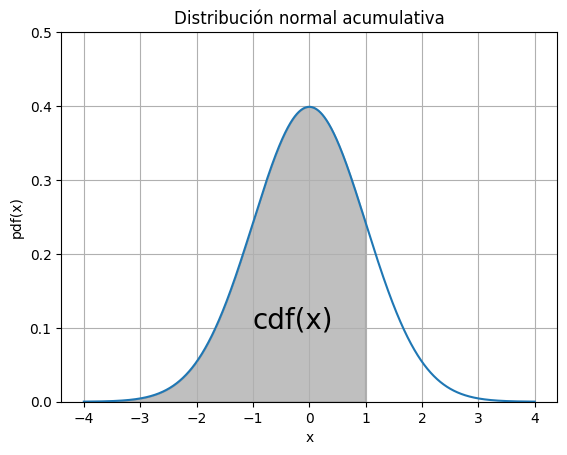

In [26]:
from scipy.stats import norm
fig, ax = plt.subplots()
# for distribution curve
x= np.arange(-4,4,0.001)
ax.plot(x, norm.pdf(x))
ax.set_title("Distribuci√≥n normal acumulativa")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
# for fill_between
px=np.arange(-4,1,0.01)
ax.set_ylim(0,0.5)
ax.fill_between(px,norm.pdf(px),alpha=0.5, color='grey')
# for text
ax.text(-1,0.1,"cdf(x)", fontsize=20)
plt.show()

**Ejemplo:**

Si $Z\sim N(0,1)$, encuentra $\mathbb{P}(-1.93 < Z < 1.93)$. La probabilidad buscada es:


In [21]:
norm(0,1).cdf(1.93)-norm(0,1).cdf(-1.93)

np.float64(0.9463931622458901)

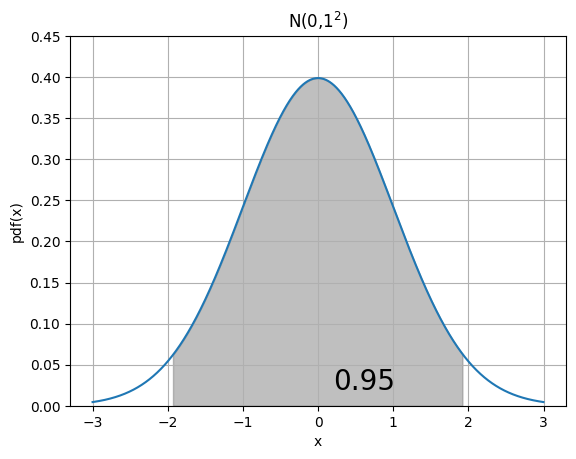

In [25]:
fig, ax = plt.subplots()
# for distribution curve
x= np.arange(-3,3,0.001)
ax.plot(x, norm.pdf(x,loc=0,scale=1))
ax.set_title("N(0,$1^2$)")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
px=np.arange(-1.93,1.93,0.01)
ax.set_ylim(0,0.45)
ax.fill_between(px,norm.pdf(px,loc=0,scale=1),alpha=0.5, color='grey')
pro=norm(0, 1).cdf(1.93) - norm(0,1).cdf(-1.93)
ax.text(0.2,0.02,round(pro,2), fontsize=20)
plt.show()

### 2.2.6 Variable aleatoria Gamma con par√°metros $\alpha$ y $\lambda$.

La distribuci√≥n gamma se obtiene al considerar el tiempo que transcurre entre cierto n√∫mero de ocurrencias de eventos que ocurren aleatoriamente en el tiempo

La funci√≥n gamma $\Gamma:(0,\infty)\to \mathbb{R}$ est√° definida como
	$$\Gamma(\alpha)=\int_{0}^{\infty}t^{\alpha-1}e^{-t}dt.$$



**Propiedades de la funci√≥n gamma**
- $\Gamma(\alpha)<\infty$ para cualquier $\alpha>0$.
- $\Gamma(\alpha+1)=\alpha\Gamma(\alpha)$.
- Si $n\geq 1$ $\Gamma(n)=(n-1)!$
- $\Gamma\left(\frac{1}{2} \right)=\sqrt{\pi}$.



 Si $\alpha$ y $\lambda$ son reales positivos, decimos que una variable aleatoria $X$ tiene distribuci√≥n gamma con par√°metros $\alpha$ y $\lambda$ si tiene por funci√≥n de densidad:
	$$\displaystyle f_{X}(x)=\begin{cases}
	\displaystyle \frac{\lambda^{\alpha}x^{\alpha-1}e^{-\lambda x} }{\Gamma(\alpha)} & x>0\\
	0 & \text{en otro caso}
	\end{cases}$$
En esta caso, escribimos la informaci√≥n anterior como $X\sim \Gamma(\alpha,\lambda) $

**Nota:**

Si $X\sim N(0,1)$, entonces $X^{2}\sim \Gamma\left(\frac{1}{2}, \frac{1}{2} \right)$.
En efecto, Para $z>0$, se tiene:
	$$F_{X^{2}}(z)=\mathbb{P}(X^2\leq z)=\mathbb{P}(-\sqrt{z}\leq X\leq \sqrt{z})=F_{X}(\sqrt{z})-F_{X}(-\sqrt{z}).$$
Por lo tanto,
$$f_{X^2}(z)=\frac{d F_{X^{2}}(z)}{dz}=\frac{1}{2\sqrt{z}}f_{X}(\sqrt{z})+\frac{1}{2\sqrt{z}}f_{X}(-\sqrt{z})=\frac{1}{\sqrt{z}}f_{X}(z).$$
Ahora,
$$f_{X}(\sqrt{z})=\frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}z}.$$

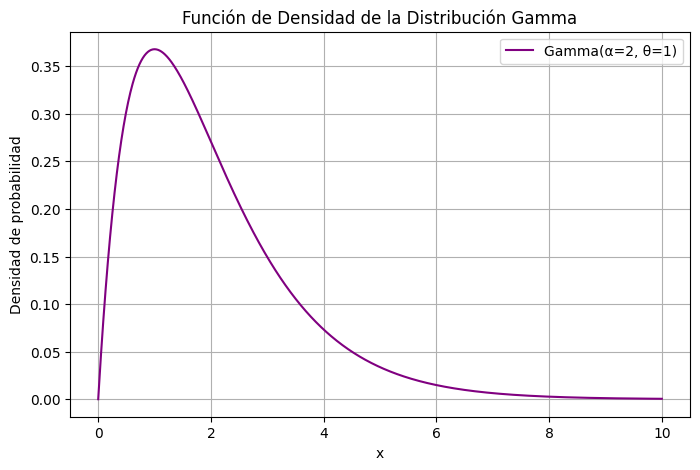

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Par√°metros de la distribuci√≥n Gamma
shape_param = 2  # Par√°metro de forma (k o Œ±)
scale_param = 1  # Par√°metro de escala (Œ∏)

# Generar valores de x
x = np.linspace(0, 10, 1000)

# Calcular la PDF de la distribuci√≥n Gamma
gamma_pdf = gamma.pdf(x, a=shape_param, scale=scale_param)

# Graficar la PDF de la distribuci√≥n Gamma
plt.figure(figsize=(8, 5))
plt.plot(x, gamma_pdf, label=f'Gamma(Œ±={shape_param}, Œ∏={scale_param})', color='purple')
plt.xlabel('x')
plt.ylabel('Densidad de probabilidad')
plt.title('Funci√≥n de Densidad de la Distribuci√≥n Gamma')
plt.grid(True)
plt.legend()
plt.show()

## 2.3 Simulaci√≥n de Variables Aleatorias

**M√©todos para generar variables aleatorias utilizados en simulaci√≥n computacional**.

Se abordan distribuciones uniformes, exponenciales, normales, binomiales y Poisson, entre otras, as√≠ como t√©cnicas como la transformada inversa y el m√©todo del rechazo.

**Ejemplos comunes en simulaci√≥n:**
- Tiempo entre llegada de cada persona  
- N√∫mero de personas por minuto  
- N√∫mero de art√≠culos por persona  
- Cantidad de dinero ganado cada hora  
- Tiempo de atenci√≥n por cliente  
- N√∫mero de veces que la cajera solicita ayuda durante la jornada  
- Cantidad de gente que est√° formada  
- N√∫mero de personas que pagan con tarjeta

### M√©todos de generaci√≥n de n√∫meros aleatorios rectangulares

La generaci√≥n de variables aleatorias con esta distribuci√≥n es importante porque las variables que tengan una distribuci√≥n diferente, tendr√°n que usar a √©sta como base.

- Cada posible resultado entre $a$ y $b$ tiene la misma probabilidad $1/n$.

Las variables generadas deben cumplir con:
- Los valores generados deben ser independientes y estar id√©nticamente distribuidos
- La secuencia generada debe ser lo m√°s larga posible y ser reproducibles
- Debe permitir generar m√∫ltiples secuencias
- Que usen poca memoria

Hist√≥ricamente se han usado cuatro tipos de m√©todos para generar sucesiones de n√∫meros rectangulares:
- M√©todos manuales
- Tablas de biblioteca
- Computaci√≥n anal√≥gica
- Computaci√≥n digital

### 2.3.1 Generaci√≥n Pseeudoaleatoria

La generaci√≥n de los n√∫meros aleatorios rectangulares debe realizarse a trav√©s de relaciones matem√°ticas de recurrencia. Por esta raz√≥n se consideran **pseudoaleatorios**, ya que el proceso para generarlos es determin√≠stico.

Hay dos m√©todos que son los m√°s utilizados para la generaci√≥n. Ambos se basan en la siguiente definici√≥n:

**Definici√≥n.** Dos enteros $a$ y $b$ son congruentes m√≥dulo $m$ si su diferencia es un m√∫ltiplo entero de $m$ y se expresa como
$$ùëé \equiv ùëè ( \text{ùëöoùëë } ùëö)$$
Como consecuencia:
- $(a-b)$ es divisible entre $m$
- $a$ y $b$ dan el mismo residuo al ser divididos entre $m$

### 2.3.2 M√©todo congruencial multiplicativos

Generar una secuencia de n√∫meros pseudoaleatorios uniformes en el intervalo (0, 1) usando la siguiente f√≥rmula recursiva:

$$n_{i+1} = a n_i \mod m$$
- $m$ debe ser tan grande como sea posible, dependiendo de los bits por palabra que maneje la computadora, descontando el bit del signo ($b$). Por lo tanto: $m = 2^b$
- $a$ debe satisfacer que $a \approx 2^{(b+1)/2}$ y que $a \equiv \pm 3 \mod 8$. La segunda expresi√≥n equivale a $( a-(\pm3 ) )$ es m√∫ltiplo de $8$.
- $n_0$: entero positivo impar menor a $m$
- El periodo ser√° de longitud: $m/4$

In [28]:
# n0 : valor inicial o semilla
# a : multiplicador
# m : modulo (2^b)
# n : el n√∫mero de numeros que quiero generar

def multiplicativo(n0,a,m,n):
    secuencia = []
    ni = n0 # iniciar con una semilla
    for _ in range(n):
        ni = (a * ni) % m # calculo el sig numero utilizando la formula recurrente
        secuencia.append(ni/m) # normaliza entre 0 y 1
    return secuencia

In [29]:
m = 2**31
a = 65539 # a ‚â°  +-3 mod 8
n0 = 12345
n=10

secuencia_mult = multiplicativo(n0,a,m,n)
print(secuencia_mult)

[0.37675674771890044, 0.2604887490160763, 0.17212176462635398, 0.6883318466134369, 0.5808951980434358, 0.29038456873968244, 0.5142506300471723, 0.4720426616258919, 0.20400029933080077, 0.9756178413517773]


In [30]:
import numpy as np
import plotly.graph_objects as go # Para gr√°ficos interactivos

# Generamos ambas secuencias
secuencia_mult = multiplicativo(n0,a,m,n)
secuencia_numpy = np.random.uniform(0,1,n)

# figura con Plotly
fig = go.Figure()

# A√±adir los histogramas
fig.add_trace(go.Histogram(
    x=secuencia_mult,
    nbinsx = 40,
    opacity = 0.6,
    name = 'M√©todo multiplicativo',
    marker_color='red'
))

fig.add_trace(go.Histogram(
    x=secuencia_numpy,
    nbinsx = 40,
    opacity = 0.6,
    name = 'Numpy random uniform',
    marker_color='blue'
))

fig.update_layout(
    barmode='overlay', #superpone los histogramas
    title = 'Compararaci√≥n: M√©todo multiplicativo -vs- Numpy',
    xaxis_title='valor generado',
    yaxis_title='Frecuencia',
    legend_title='M√©todo',
    bargap=0.05
)

fig.show()

### 2.3.3 M√©todo congruencial mixto

Este m√©todo genera n√∫meros pseudoaleatorios con la f√≥rmula:
$$n_{i+1} = (a n_i + c) \mod m$$

**Obs.** Se le llama ‚Äúmixto‚Äù porque incluye una constante adicional $c$ (a diferencia del m√©todo multiplicativo).

- $m = 2^b$
- $a \approx 2^{(b-1)/2}$, $a \equiv 1 \mod 4$
- $c$, $n_0$: enteros positivos impares $< m$
- Periodo: $m$

In [31]:
# n0 : valor inicial o semilla
# a : multiplicador
# c : deber ser impar
# m : modulo (2^b)
# n : el n√∫mero de numeros que quiero generar

def mixto(n0,a,c,m,n):
    secuencia = []
    ni = n0 # iniciar con una semilla
    for _ in range(n):
        ni = (a * ni + c) % m # calculo el sig numero utilizando la formula recurrente
        secuencia.append(ni/m) # normaliza entre 0 y 1
    return secuencia

In [32]:
m = 2**31
a = 1103515245 # a cong 1 mod----
c = 12345
n0 = 42
n= 10

secuencia_mixto = mixto(n0,a,c,m,n)
print(secuencia_mixto)

[0.5823075897060335, 0.5198187492787838, 0.46597642498090863, 0.7770372582599521, 0.42286502895876765, 0.03337232954800129, 0.41738913068547845, 0.8087285170331597, 0.6123396842740476, 0.7149040475487709]


In [33]:
# Generamos ambas secuencias
secuencia_mixto = mixto(n0,a,c,m,n)
secuencia_numpy = np.random.uniform(0,1,n)

# figura con Plotly
fig = go.Figure()

# A√±adir los histogramas
fig.add_trace(go.Histogram(
    x=secuencia_mixto,
    nbinsx = 40,
    opacity = 0.6,
    name = 'M√©todo mixto',
    marker_color='red'
))

fig.add_trace(go.Histogram(
    x=secuencia_numpy,
    nbinsx = 40,
    opacity = 0.6,
    name = 'Numpy random uniform',
    marker_color='blue'
))

fig.update_layout(
    barmode='overlay', #superpone los histogramas
    title = 'Compararaci√≥n: M√©todo mixto -vs- Numpy',
    xaxis_title='valor generado',
    yaxis_title='Frecuencia',
    legend_title='M√©todo',
    bargap=0.05
)

fig.show()

In [34]:
import random
n = 1000

# Generar secuencia usando random.random()
secuencia_random = [random.random() for _ in range(n)]

# Generar secuencia usando numpy
secuencia_numpy = np.random.uniform(0, 1, n)

# Graficar histogramas
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=secuencia_random,
    nbinsx=40,
    opacity=0.6,
    name='random.random()',
    marker_color='crimson'
))

fig.add_trace(go.Histogram(
    x=secuencia_numpy,
    nbinsx=40,
    opacity=0.6,
    name='numpy.random.uniform',
    marker_color='royalblue'
))

fig.update_layout(
    barmode='overlay',
    title='Comparaci√≥n: random.random() vs numpy.random.uniform',
    xaxis_title='Valor generado',
    yaxis_title='Frecuencia',
    legend_title='M√©todo',
    bargap=0.05
)

fig.show()

### M√©todos de generaci√≥n de n√∫meros aleatorios no rectangulares

### 2.3.4 M√©todo de la transformada inversa


El m√©todo utiliza la funci√≥n de distribuci√≥n $F(x)$ de la distribuci√≥n que se va a simular
$$F(x) = \int_{-\infty}^{x} f(t)\,dt$$

Como se sabe, los valores de $F(x)$ est√°n en el intervalo $(0,1)$ al igual que los n√∫meros rectangulares $U$.

El m√©todo genera un $U$ y trata de determinar el valor de la variable aleatoria para la cual $F(x)$ sea igual a $U$.

Si $U \in (0,1)$:
$$ F(x) = U \quad \Rightarrow \quad x = F^{-1}(U)$$

$\mathbf{Teorema}.$ Sea $X$ una variable aleatoria real. Supongamos que su funci√≥n de distribuci√≥n $F$ es estrictamente creciente (por lo que $F$ es una biyecci√≥n de $\mathbb{R}$ sobre $(0,1)$ y podemos denotar por $F^{-1}$ a su inversa). Sea $U\sim \text{unif}[0,1]$. Entonces $F^{-1}(U)$ tiene la misma ley que $X$.

Si $F$ no es estrictamente creciente, hemos visto que el teorema precedente sigue siendo v√°lido bajo la condici√≥n de definir
$$F^{-1}(u)=\inf\{ x\in \mathbb{R} : F(x)\geq u\},$$
la inversa generalizada de $F$.

In [35]:
# Vamos a simular una v.a. Bernoulli usando una Uniforme
import random
def bernoulli(p):
    u = random.random() # U -> Unif(0,1)
    return 1 if u <= p else 0

In [36]:
# Simulamos n valores con p de √©xito
p = 0.5
simulaciones = [bernoulli(p) for _ in range(100)]
print(simulaciones)

[1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1]


In [37]:
sum(simulaciones)

49

**Ejemplo**: Distribuci√≥n exponencial

sea $\theta,\lambda>0$, entonces a trav√©s del teorema se puede generar una v.a. exponencial.

Sea $U \sim Unif[0,1]$, entonces si $X\sim Exp(\lambda)$, entonces

$$f_{X}(x) = \lambda e^{-\lambda x}$$
y que
$$ F_X(x) = 1-e^{-\lambda x} $$

Sabemos que $1-e^{-\lambda x} = U$, entonces $1-U = e^{-\lambda x}$, y tomando logaritmo, se tiene que
$ \ln(1-U) = -\lambda x$ y como $U$ es uniforme entonces $U \sim 1-U$, por lo que depejando a $x$, se tiene que
$$ X = -\frac{\ln(U)}{\lambda} \sim Exp(\lambda) $$

**Ejemplo:** Distribuci√≥n Uniforme Continua
$$f(x) = \frac{1}{b-a}, \quad a \leq x \leq b$$
$$F(x) = \frac{x-a}{b-a} = U \Rightarrow x = a + (b-a)U$$

In [38]:
import numpy as np
import plotly.graph_objects as go

# Semilla
np.random.seed(123)

# Par√°metro de la exponencial
lambd = 4
n = 10000

# Simulaci√≥n usando transformada inversa
uniformes = np.random.random(n)
exponenciales = -np.log(uniformes) / lambd

# Curva te√≥rica
x_vals = np.linspace(0, exponenciales.max(), 300)
y_vals = lambd * np.exp(-lambd * x_vals)

# Gr√°fico
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=exponenciales,
    nbinsx=40,
    histnorm='probability density',
    marker_color='skyblue',
    name='Simulaci√≥n'
))

fig.add_trace(go.Scatter(
    x=x_vals,
    y=y_vals,
    mode='lines',
    name='Densidad te√≥rica',
    line=dict(color='darkblue')
))

fig.update_layout(
    title='Distribuci√≥n Exponencial simulada vs te√≥rica (Œª = 1)',
    xaxis_title='x',
    yaxis_title='Densidad',
    bargap=0.05
)

fig.show()

In [39]:
# Par√°metros de la uniforme
a, b = 2, 5
n = 10000

# Simulaci√≥n por transformaci√≥n lineal
uniformes = np.random.random(n)
uniforme_continua = a + (b - a) * uniformes

# Densidad te√≥rica (constante)
x_vals = np.linspace(a, b, 300)
y_vals = np.ones_like(x_vals) * (1 / (b - a))

# Gr√°fico
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=uniforme_continua,
    nbinsx=40,
    histnorm='probability density',
    marker_color='orange',
    name='Simulaci√≥n'
))

fig.add_trace(go.Scatter(
    x=x_vals,
    y=y_vals,
    mode='lines',
    name='Densidad te√≥rica',
    line=dict(color='red')
))

fig.update_layout(
    title='Distribuci√≥n Uniforme Continua simulada vs te√≥rica [2, 5]',
    xaxis_title='x',
    yaxis_title='Densidad',
    bargap=0.05
)

fig.show()

**Ejercicio:** (Variable aleatoria Cauchy) Simulemos la variable aleatoria de Cauchy de par√°metro $1$ que tiene por funci√≥n de densidad
$$\frac{1}{\pi}\frac{1}{1+x^{2}}.$$


- Corroborar que la funci√≥n as√≠ definida es una funci√≥n de densidad de probabilidad
- Encontrar F_X
- Crear una gr√°fica en Python que muestre su forma
- Generar v.a. Cauchy a partir de una uniforme

Por el teorema anterior, para $u\in (0,1)$
$$u=\frac{1}{\pi}\arctan(x)+\frac{1}{2} \qquad \text{si y s√≥lo si} \qquad x=\tan\left({\pi}\left(u-\frac{1}{2} \right) \right).$$

In [40]:
import numpy as np
import plotly.graph_objects as go
# Semilla
np.random.seed(123)
# 1. Par√°metros
n = 10000

In [41]:
uniformes = np.random.random(n)
cauchy_simulada = np.tan(np.pi * (uniformes - 0.5))
def f_cauchy(x):
    return (1 / np.pi) * (1 / (1 + x**2))
x_vals = np.linspace(-10, 10, 500)
y_vals = f_cauchy(x_vals)
#Crear gr√°fico interactivo con Plotly
fig = go.Figure()
fig.add_trace(go.Histogram(
    x=cauchy_simulada,
    nbinsx=100,
    histnorm='probability density',
    marker_color='blue',
    name='Simulaci√≥n'
))

In [42]:
fig.add_trace(go.Scatter(
    x=x_vals,
    y=y_vals,
    mode='lines',
    name='Densidad te√≥rica',
    line=dict(color='red')
))

fig.update_layout(
    title='Distribuci√≥n Cauchy simulada vs te√≥rica',
    xaxis_title='x',
    yaxis_title='Densidad',
    bargap=0.05
)

fig.show()

## 2.4 Funci√≥n Generadora de Momentos

Es una herramienta que permite obtener de forma sistem√°tica los momentos (esperanza, varianza, curtosis, etc.) de una variable aleatoria, ya sea discreta o continua.

La funci√≥n generadora de momentos de una variable aleatoria $X$, denotada por $M_X(t)$, se define como la esperanza de $e^{tX}$, donde $t$ es un par√°metro real. Es decir:

$$M_X(t) = E[e^{tX}]$$

Nos permite calcular los momentos de cualquier orden simplemente derivando la FGM respecto a t y evaluando en $t=0$

* **Primer momento (esperanza)**:
$$E[X]=M'_X(0)$$
* **Segundo momento:**
$$E[X^2]=M''_X(0)$$

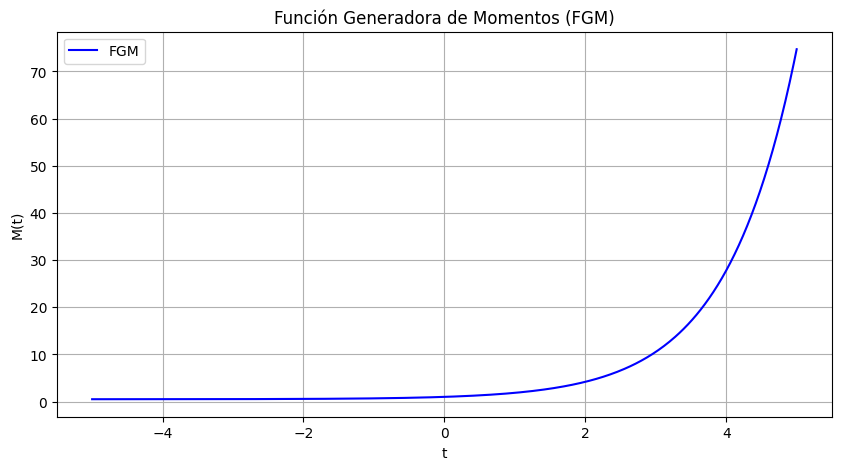

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Definir los valores y sus probabilidades
valores = np.array([0, 1])
probabilidades = np.array([0.5, 0.5])

# Definir los valores de t
t = np.linspace(-5, 5, 500)

# Definir la funci√≥n generadora de momentos
def fgm(t):
    return np.sum(probabilidades * np.exp(t[:, None] * valores), axis=1)

# Calcular los valores de la FGM
fgm_vals = fgm(t)

# Graficar la FGM
plt.figure(figsize=(10,5))
plt.plot(t, fgm_vals, color='blue', label='FGM')
plt.title("Funci√≥n Generadora de Momentos (FGM)")
plt.xlabel('t')
plt.ylabel('M(t)')
plt.grid(True)
plt.legend()
plt.show()

## 2.5 Funci√≥n Caracter√≠stica

La Funci√≥n Caracter√≠stica (FC) de una variable aleatoria es otra forma de describir completamente su distribuci√≥n de probabilidad, similar a la funci√≥n generadora de momentos (FGM), pero usando n√∫meros complejos.

La funci√≥n caracter√≠stica de una variable aleatoria $X$, denotada por $\phi_X(t)$, se define como la esperanza de $e^{itX}$, donde $t$ es un par√°metro real e $i$ es la unidad imaginaria ($i^2 = -1$). Es decir:

$$\phi_X(t) = E[e^{itX}]$$


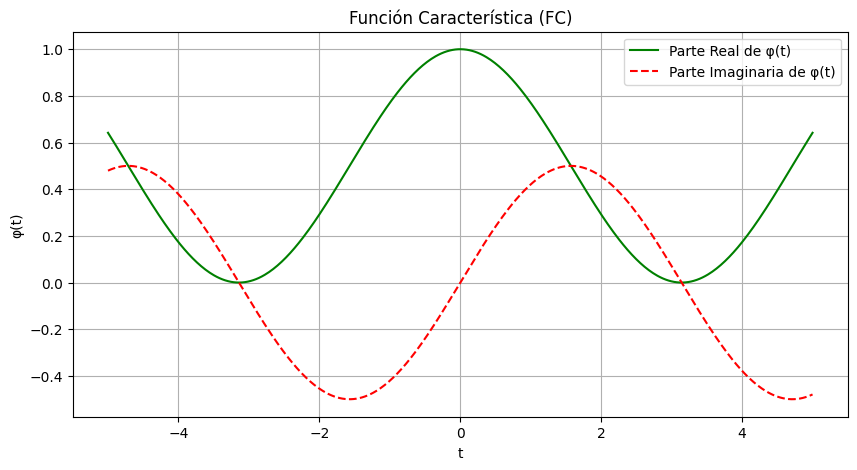

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Definir los valores y sus probabilidades
valores = np.array([0, 1])
probabilidades = np.array([0.5, 0.5])

# Definir los valores de t
t = np.linspace(-5, 5, 500)

# Definir la funci√≥n caracter√≠stica
def fc(t):
    return np.sum(probabilidades * np.exp(1j * t[:, None] * valores), axis=1)

# Calcular los valores de la FC
fc_vals = fc(t)

# Graficar la parte real e imaginaria de la FC
plt.figure(figsize=(10,5))
plt.plot(t, fc_vals.real, color='green', label='Parte Real de œÜ(t)')
plt.plot(t, fc_vals.imag, color='red', linestyle='--', label='Parte Imaginaria de œÜ(t)')
plt.title("Funci√≥n Caracter√≠stica (FC)")
plt.xlabel('t')
plt.ylabel('œÜ(t)')
plt.grid(True)
plt.legend()
plt.show()

## 2.6 Ley de los Grandes N√∫meros

Es un teorema fundamental, el cual nos dice que cuando repetimos un experimento aleatorio muchas veces, el promedio de los resultados obtenidos tiende a acercarse al valor esperado (esperanza matem√°tica) de la variable aleatoria.

Sea $X_1,X_2,\dots,X_n$ una sucesi√≥n de variables aleatorias independientes e id√©nticamente distribuidas con un valor esperado $\mu$

Entonces:
$$\lim_{x\to ‚àû}\frac{1}{n}\sum_{i=1}^{n}X_i=\mu$$
Con probabilidad 1

**Simulaci√≥n de la LGN:**

Simualaremos los lanzamientos de un dado y calcularemos la media

$$ \Omega = \{ 1,2,3,4,5,6, \}$$

La media te√≥rica : $$\mathbb{E}[X] = 3.5$$

In [46]:
import numpy as np
import pandas as pd #Manejo y manipulacion de datos
import matplotlib.pyplot as plt
import seaborn as sns #Visualizacion de datos

In [47]:
np.random.seed(42) # numeros pseudoaletorios sean reproducibles
lanzamientos = np.random.randint(1,7,10000)

In [48]:
media_acum = np.cumsum(lanzamientos) / np.arange(1,10001)
df = pd.DataFrame( {
    'Lanzamiento': np.arange(1,10001),
    'Media Acumulada': media_acum } )

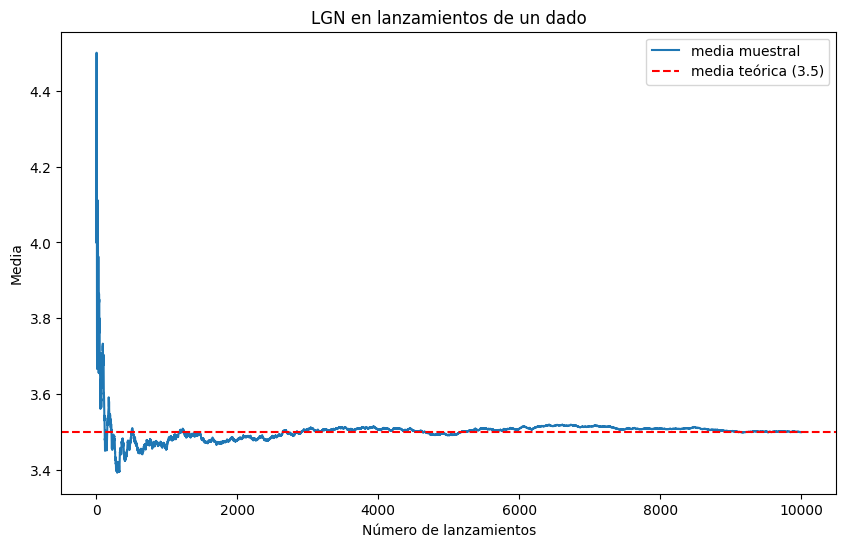

In [49]:
plt.figure(figsize=(10,6))
plt.plot(df['Lanzamiento'], df['Media Acumulada'], label='media muestral')
plt.axhline(3.5, color= 'red', linestyle='--', label='media te√≥rica (3.5)')
plt.xlabel('N√∫mero de lanzamientos')
plt.ylabel('Media')
plt.title('LGN en lanzamientos de un dado')
plt.legend()
plt.show()

**Problema de la Aguja de Bufon:**

Estimaci√≥n de pi: 3.14896162990254


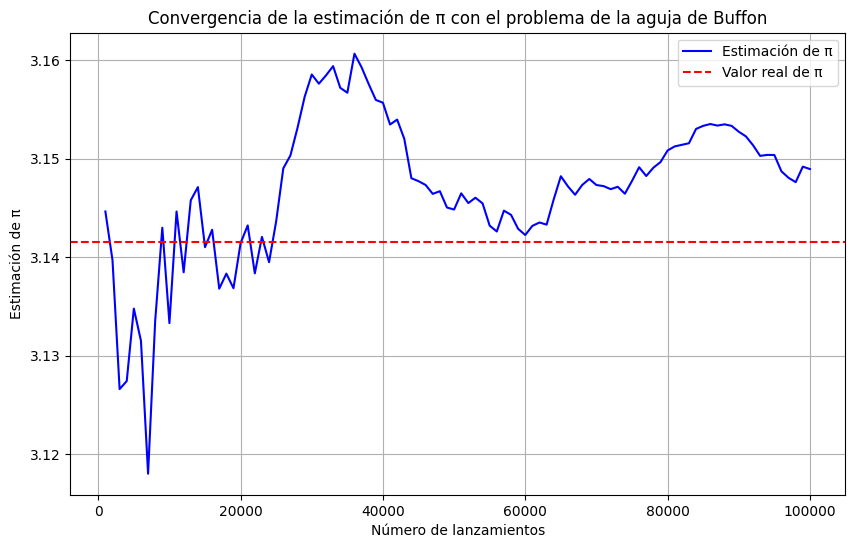

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Par√°metros del problema
L = 1.0  # Longitud de la aguja
d = 1.0  # Distancia entre las l√≠neas paralelas
num_trials = 100000  # N√∫mero total de lanzamientos
step = 1000  # N√∫mero de lanzamientos por paso para la estimaci√≥n de pi

# Listas para almacenar los valores de pi estimados y los lanzamientos
pi_estimates = []
trial_steps = []

# Contador para cu√°ntas agujas cruzan una l√≠nea
crossed_lines = 0

# Simulaci√≥n de lanzamientos de la aguja y estimaci√≥n de pi en pasos
for trial in range(1, num_trials + 1):
    # Posici√≥n del centro de la aguja
    center_position = np.random.uniform(0, d / 2)

    # √Ångulo aleatorio entre 0 y pi (√°ngulo en radianes)
    angle = np.random.uniform(0, np.pi)

    # Distancia desde el centro de la aguja hasta la l√≠nea m√°s cercana
    distance_to_nearest_line = L / 2 * np.sin(angle)

    # Verificamos si la aguja cruza una l√≠nea
    if center_position <= distance_to_nearest_line:
        crossed_lines += 1

    # Estimaci√≥n de pi en pasos
    if trial % step == 0 and crossed_lines > 0:
        pi_estimate = (2 * L * trial) / (crossed_lines * d)
        pi_estimates.append(pi_estimate)
        trial_steps.append(trial)

print(f"Estimaci√≥n de pi: {pi_estimate}")

# Plot de la estimaci√≥n de pi a lo largo de los lanzamientos
plt.figure(figsize=(10, 6))
plt.plot(trial_steps, pi_estimates, label="Estimaci√≥n de œÄ", color="blue")
plt.axhline(y=np.pi, color="red", linestyle="--", label="Valor real de œÄ")
plt.xlabel('N√∫mero de lanzamientos')
plt.ylabel('Estimaci√≥n de œÄ')
plt.title('Convergencia de la estimaci√≥n de œÄ con el problema de la aguja de Buffon')
plt.legend()
plt.grid(True)
plt.show()

## 2.7 Teorema del L√≠mite Central


El Teorema del L√≠mite Central (TCL)  establece que la distribuci√≥n de la suma, o el promedio de una gran cantidad de variables aleatorias independientes e id√©nticamente distribuidas, independientemente de la forma de la distribuci√≥n original de estas variables, tender√° a una distribuci√≥n normal a medida que aumenta el n√∫mero de variables.


Sean $X_1, X_2, ..., X_n$ una secuencia de $n$ variables aleatorias independientes e id√©nticamente distribuidas con media $\mu$ y varianza finita $\sigma^2$. Sea $S_n$ la suma de estas variables:

$$S_n = X_1 + X_2 + ... + X_n$$

Entonces, a medida que $n$ tiende a infinito, la distribuci√≥n de la variable aleatoria estandarizada:

$$Z_n = \frac{S_n - n\mu}{\sigma \sqrt{n}} = \frac{\bar{X}_n - \mu}{\sigma / \sqrt{n}}$$

donde $\bar{X}_n = S_n / n$ es la media muestral, converge en distribuci√≥n a una distribuci√≥n normal est√°ndar con media 0 y varianza 1, denotada como $N(0, 1)$.

**Aplicaci√≥n del TCL:**

<ipython-input-51-dbda25c73d9a>:15: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




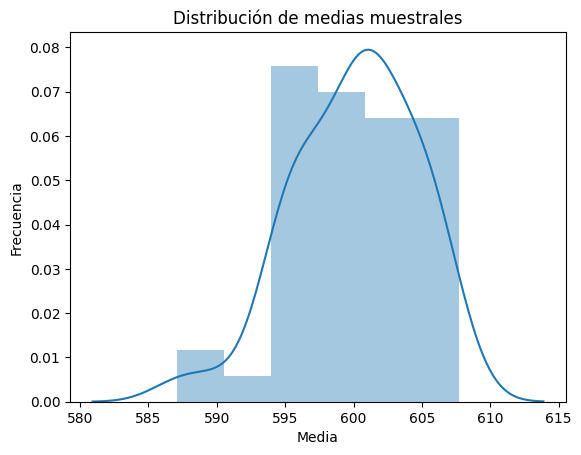

In [51]:
# Crear el DataFrame con 50 muestras, cada una con 10 observaciones de una binomial(n=1000, p=0.6)
df = pd.DataFrame()

for i in range(1,51):
  muestra = np.random.binomial(1000,0.6,10)  # Muestra aleatoria de binomiales de 10 √©xitos, se realiza 1000 veces el experimento
  col = f"muestra {i}"
  df[col] = muestra

df.head(5)  # Mostrar las primeras 5 filas

# Calcular el promedio de cada muestra
df_muestra_medias = pd.DataFrame(df.mean(), columns=["Media de la muestra"])

# Visualizar la distribuci√≥n de las medias
sns.distplot(df_muestra_medias)
#sns.histplot(df_muestra_medias["Media de la muestra"], kde=True)
plt.title("Distribuci√≥n de medias muestrales")
plt.xlabel("Media")
plt.ylabel("Frecuencia")
plt.show()